In [45]:
import h2o
h2o.init(max_mem_size=16G)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/ubuntu/Anaconda/envs/keras_env/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbeewitew
  JVM stdout: /tmp/tmpbeewitew/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbeewitew/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54325
Connecting to H2O server at http://127.0.0.1:54325 ... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.2
H2O cluster version age:,1 month and 7 days
H2O cluster name:,H2O_from_python_unknownUser_8ipqut
H2O cluster total nodes:,1
H2O cluster free memory:,2.932 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [46]:
#Import H2O and other libraries that will be used in this tutorial 
import h2o
import matplotlib as plt

#Import the Estimators
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

#Import h2o grid search 
import h2o.grid 
from h2o.grid.grid_search import H2OGridSearch

In [47]:
loan_level = h2o.import_file("https://s3.amazonaws.com/data.h2o.ai/DAI-Tutorials/loan_level_500k.csv")

Parse progress: |██████████████████████████████████████████████████████████| 100%


In [48]:
loan_level

CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
669,200206,N,202901,nan,0,1,O,80,33,162000,80,7.12,R,N,FRM,WV,SF,26100,F199Q1000004,P,320,2,Other sellers,Other servicers,TRUE,FALSE
732,199904,N,202903,17140,0,1,O,25,10,53000,25,6.5,R,N,FRM,OH,SF,45200,F199Q1000005,N,360,1,Other sellers,Other servicers,TRUE,FALSE
679,200208,N,202902,15940,30,1,O,91,48,133000,91,6.75,R,N,FRM,OH,SF,44700,F199Q1000007,P,319,1,Other sellers,Other servicers,TRUE,FALSE
721,200209,N,202902,38060,0,1,O,39,13,174000,39,6.625,T,N,FRM,AZ,SF,85200,F199Q1000013,N,318,2,Other sellers,Other servicers,TRUE,FALSE
618,200210,N,202902,10420,25,1,O,85,24,122000,85,6.375,R,N,FRM,OH,SF,44200,F199Q1000015,N,317,2,Other sellers,Other servicers,TRUE,FALSE
738,200211,N,202903,10420,0,1,O,73,44,218000,73,6,R,N,FRM,OH,SF,44300,F199Q1000016,P,317,2,Other sellers,Other servicers,TRUE,FALSE
761,200211,N,202904,nan,0,1,O,73,31,138000,73,6.375,R,N,FRM,SC,PU,29500,F199Q1000017,P,318,2,Other sellers,Other servicers,TRUE,FALSE
707,200211,N,202903,33340,0,1,O,60,57,136000,60,6.25,R,N,FRM,WI,SF,53000,F199Q1000018,C,317,2,Other sellers,Other servicers,TRUE,FALSE
760,200211,N,202903,33340,0,1,O,63,30,79000,63,6.125,R,N,FRM,WI,SF,53000,F199Q1000019,N,317,2,Other sellers,Other servicers,TRUE,FALSE
691,200302,N,202901,15940,0,1,O,65,25,130000,65,5.875,R,N,FRM,OH,SF,44700,F199Q1000023,P,312,2,Other sellers,Other servicers,TRUE,FALSE


In [49]:
type(loan_level)

h2o.frame.H2OFrame

In [50]:
loan_level.describe()

Rows:500137
Cols:27




,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
type,int,int,enum,int,int,int,int,enum,int,int,int,int,real,enum,enum,enum,enum,enum,int,string,enum,int,int,enum,enum,enum,enum
mins,300.0,199901.0,,202402.0,10180.0,0.0,1.0,,6.0,1.0,8000.0,6.0,4.625,,,,,,600.0,NaN,,301.0,1.0,,,,
mean,712.5362124215479,200025.43095191906,,203023.19587233098,30777.824739295032,7.744531707523449,1.0288902574110124,,76.05357071446291,32.917540518705366,136493.484785169,75.71071405720127,7.18268686379932,,,,,,55490.85713828669,NaN,,359.8554696013292,1.630294664826265,,,,
maxs,839.0,201103.0,,204101.0,49740.0,55.0,4.0,,180.0,65.0,578000.0,100.0,11.5,,,,,,99900.0,NaN,,362.0,2.0,,,,
sigma,54.791261974088236,109.81554141481806,,110.38418855756446,11333.401144164467,12.046545969492545,0.21839057355939107,,15.139986048512696,11.111799994455254,60968.74306564561,14.937717088968691,0.5799408623980612,,,,,,29505.38225880302,NaN,,1.9082507104186943,0.48272535304031616,,,,
zeros,0,0,,0,0,309979,0,,0,0,0,0,0,,,,,,0,0,,0,0,,,,
missing,2711,0,0,0,70149,51048,3,0,13,14929,0,9,0,0,0,0,0,0,31,0,0,0,247,0,0,0,0
0,669.0,200206.0,N,202901.0,nan,0.0,1.0,O,80.0,33.0,162000.0,80.0,7.12,R,N,FRM,WV,SF,26100.0,F199Q1000004,P,320.0,2.0,Other sellers,Other servicers,TRUE,FALSE
1,732.0,199904.0,N,202903.0,17140.0,0.0,1.0,O,25.0,10.0,53000.0,25.0,6.5,R,N,FRM,OH,SF,45200.0,F199Q1000005,N,360.0,1.0,Other sellers,Other servicers,TRUE,FALSE
2,679.0,200208.0,N,202902.0,15940.0,30.0,1.0,O,91.0,48.0,133000.0,91.0,6.75,R,N,FRM,OH,SF,44700.0,F199Q1000007,P,319.0,1.0,Other sellers,Other servicers,TRUE,FALSE


In [51]:
train, valid, test = loan_level.split_frame([0.7, 0.15], seed=42)
print("train:%d valid:%d test:%d" % (train.nrows, valid.nrows, test.nrows))

train:350268 valid:74971 test:74898


In [52]:
y = "DELINQUENT"
ignore = ["DELINQUENT", "PREPAID", "PREPAYMENT_PENALTY_MORTGAGE_FLAG", "PRODUCT_TYPE"] 
x = list(set(train.names) - set(ignore))

In [53]:
glm = H2OGeneralizedLinearEstimator(family = "binomial", seed=42, model_id = 'default_glm')

In [54]:
glm.train(x = x, y = y, training_frame = train, validation_frame = valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [55]:
glm

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  default_glm


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 6.626E-5 )",161,88,7,py_9_sid_8dcb




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.03142171957132889
RMSE: 0.17726172618850605
LogLoss: 0.12328049878526554
Null degrees of freedom: 350267
Residual degrees of freedom: 350179
Null deviance: 108932.13150368733
Residual deviance: 86362.42749703476
AIC: 86540.42749703476
AUC: 0.8503835552015756
AUCPR: 0.20663491297269101
Gini: 0.7007671104031512

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1282356363206364: 


,,FALSE,TRUE,Error,Rate
0,FALSE,321979.0,15628.0,0.0463,(15628.0/337607.0)
1,TRUE,7881.0,4780.0,0.6225,(7881.0/12661.0)
2,Total,329860.0,20408.0,0.0671,(23509.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.128236,0.289093,205.0
1,max f2,0.067101,0.386447,264.0
2,max f0point5,0.217436,0.288113,148.0
3,max accuracy,0.975876,0.963851,0.0
4,max precision,0.552741,0.406752,45.0
5,max recall,0.000817,1.000000,398.0
6,max specificity,0.975876,0.999997,0.0
7,max absolute_mcc,0.108858,0.267681,220.0
8,max min_per_class_accuracy,0.039128,0.772117,306.0
9,max mean_per_class_accuracy,0.034376,0.774466,313.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.61 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010001,0.315606,10.503740,10.503740,0.379675,0.447135,0.379675,0.447135,0.105047,0.105047,950.373986,950.373986
1,,2,0.020002,0.231615,7.763290,9.133515,0.280617,0.268426,0.330146,0.357781,0.077640,0.182687,676.329044,813.351515
2,,3,0.030003,0.189186,6.175883,8.147638,0.223237,0.209056,0.294509,0.308206,0.061764,0.244451,517.588314,714.763781
3,,4,0.040001,0.160763,5.340267,7.445946,0.193033,0.174289,0.269146,0.274734,0.053392,0.297844,434.026745,644.594550
4,,5,0.050002,0.140680,4.470013,6.850725,0.161576,0.150204,0.247630,0.249826,0.044704,0.342548,347.001260,585.072494
5,,6,0.100001,0.087297,3.363160,5.106992,0.121567,0.109556,0.184600,0.179693,0.168154,0.510702,236.316030,410.699240
6,,7,0.150002,0.062777,2.337808,4.183913,0.084504,0.073795,0.151234,0.144393,0.116894,0.627597,133.780791,318.391334
7,,8,0.200001,0.048144,1.679211,3.557756,0.060698,0.054923,0.128601,0.122026,0.083959,0.711555,67.921061,255.775553
8,,9,0.300002,0.031478,1.149192,2.754901,0.041539,0.038923,0.099580,0.094325,0.114920,0.826475,14.919176,175.490094
9,,10,0.399999,0.021718,0.625557,2.222576,0.022612,0.026218,0.080339,0.077298,0.062554,0.889029,-37.444271,122.257643




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.031075117591417643
RMSE: 0.17628135917168794
LogLoss: 0.12274529844188285
Null degrees of freedom: 74970
Residual degrees of freedom: 74882
Null deviance: 22974.597464481732
Residual deviance: 18404.6755389728
AIC: 18582.6755389728
AUC: 0.8450178237681047
AUCPR: 0.19799604817730218
Gini: 0.6900356475362095

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12605795173473466: 


,,FALSE,TRUE,Error,Rate
0,FALSE,68851.0,3462.0,0.0479,(3462.0/72313.0)
1,TRUE,1647.0,1011.0,0.6196,(1647.0/2658.0)
2,Total,70498.0,4473.0,0.0681,(5109.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.126058,0.283551,200.0
1,max f2,0.063173,0.373832,265.0
2,max f0point5,0.229445,0.289993,134.0
3,max accuracy,0.964445,0.964533,0.0
4,max precision,0.395160,0.398104,76.0
5,max recall,0.000476,1.000000,399.0
6,max specificity,0.964445,0.999986,0.0
7,max absolute_mcc,0.122043,0.259790,204.0
8,max min_per_class_accuracy,0.038399,0.766861,303.0
9,max mean_per_class_accuracy,0.036174,0.767391,307.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.62 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010004,0.317794,10.417340,10.417340,0.369333,0.455618,0.369333,0.455618,0.104214,0.104214,941.733985,941.733985
1,,2,0.020008,0.234316,8.273700,9.345520,0.293333,0.270835,0.331333,0.363227,0.082769,0.186983,727.369952,834.551969
2,,3,0.030012,0.187723,6.430921,8.373987,0.228000,0.208398,0.296889,0.311617,0.064334,0.251317,543.092099,737.398679
3,,4,0.040002,0.159223,4.481294,7.401787,0.158879,0.172164,0.262421,0.276789,0.044771,0.296087,348.129435,640.178718
4,,5,0.050006,0.139193,4.287281,6.778720,0.152000,0.149074,0.240331,0.251239,0.042889,0.338977,328.728066,577.871972
5,,6,0.100012,0.087251,3.197509,4.988115,0.113364,0.109587,0.176847,0.180413,0.159895,0.498871,219.750930,398.811451
6,,7,0.150005,0.062508,2.325398,4.100700,0.082444,0.073822,0.145385,0.144889,0.116253,0.615124,132.539762,310.070006
7,,8,0.200011,0.048269,1.722893,3.506209,0.061083,0.054932,0.124308,0.122398,0.086155,0.701279,72.289325,250.620872
8,,9,0.300009,0.031184,1.124921,2.712481,0.039883,0.038895,0.096168,0.094565,0.112491,0.813770,12.492095,171.248142
9,,10,0.400008,0.021592,0.665923,2.200859,0.023609,0.026053,0.078029,0.077438,0.066591,0.880361,-33.407690,120.085890




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-02-27 20:02:40,0.000 sec,0,54466.065752,0.155498
1,,2020-02-27 20:02:42,1.468 sec,1,50061.613368,0.144447
2,,2020-02-27 20:02:42,1.811 sec,2,43570.207802,0.125483
3,,2020-02-27 20:02:42,2.147 sec,3,43215.311321,0.124491
4,,2020-02-27 20:02:43,2.534 sec,4,43195.943426,0.124463
5,,2020-02-27 20:02:43,2.817 sec,5,43195.779638,0.124463
6,,2020-02-27 20:02:44,3.646 sec,6,43182.000891,0.124441
7,,2020-02-27 20:02:44,4.030 sec,7,43181.213749,0.124441


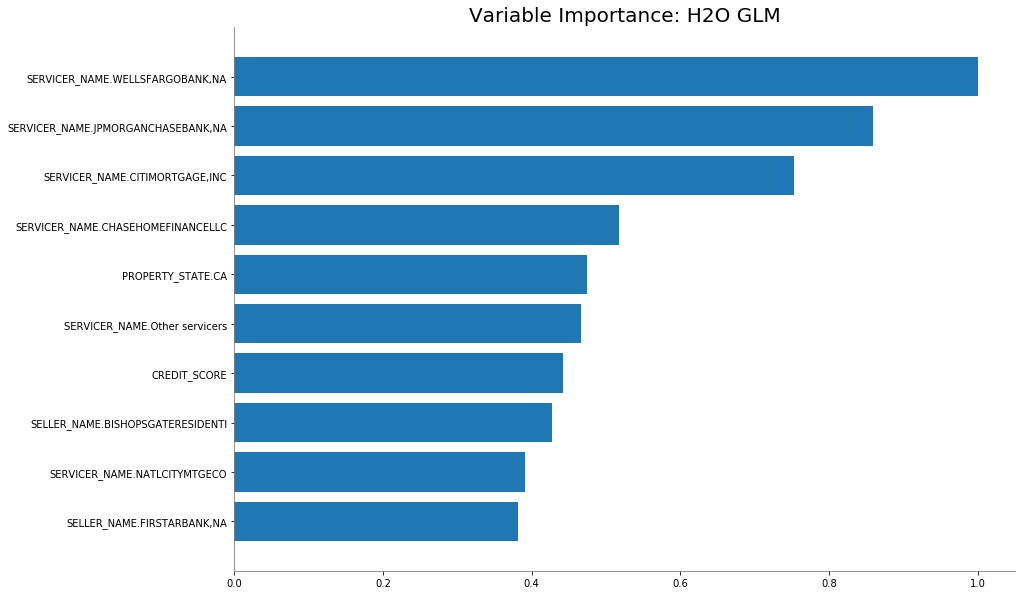

In [57]:
glm.varimp_plot()

In [58]:
default_performance = glm.model_performance(valid)
default_performance


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.031075117591417643
RMSE: 0.17628135917168794
LogLoss: 0.12274529844188285
Null degrees of freedom: 74970
Residual degrees of freedom: 74882
Null deviance: 22974.597464481732
Residual deviance: 18404.6755389728
AIC: 18582.6755389728
AUC: 0.8450178237681047
AUCPR: 0.19799604817730218
Gini: 0.6900356475362095

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12605795173473466: 


,,FALSE,TRUE,Error,Rate
0,FALSE,68851.0,3462.0,0.0479,(3462.0/72313.0)
1,TRUE,1647.0,1011.0,0.6196,(1647.0/2658.0)
2,Total,70498.0,4473.0,0.0681,(5109.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.126058,0.283551,200.0
1,max f2,0.063173,0.373832,265.0
2,max f0point5,0.229445,0.289993,134.0
3,max accuracy,0.964445,0.964533,0.0
4,max precision,0.395160,0.398104,76.0
5,max recall,0.000476,1.000000,399.0
6,max specificity,0.964445,0.999986,0.0
7,max absolute_mcc,0.122043,0.259790,204.0
8,max min_per_class_accuracy,0.038399,0.766861,303.0
9,max mean_per_class_accuracy,0.036174,0.767391,307.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.62 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010004,0.317794,10.417340,10.417340,0.369333,0.455618,0.369333,0.455618,0.104214,0.104214,941.733985,941.733985
1,,2,0.020008,0.234316,8.273700,9.345520,0.293333,0.270835,0.331333,0.363227,0.082769,0.186983,727.369952,834.551969
2,,3,0.030012,0.187723,6.430921,8.373987,0.228000,0.208398,0.296889,0.311617,0.064334,0.251317,543.092099,737.398679
3,,4,0.040002,0.159223,4.481294,7.401787,0.158879,0.172164,0.262421,0.276789,0.044771,0.296087,348.129435,640.178718
4,,5,0.050006,0.139193,4.287281,6.778720,0.152000,0.149074,0.240331,0.251239,0.042889,0.338977,328.728066,577.871972
5,,6,0.100012,0.087251,3.197509,4.988115,0.113364,0.109587,0.176847,0.180413,0.159895,0.498871,219.750930,398.811451
6,,7,0.150005,0.062508,2.325398,4.100700,0.082444,0.073822,0.145385,0.144889,0.116253,0.615124,132.539762,310.070006
7,,8,0.200011,0.048269,1.722893,3.506209,0.061083,0.054932,0.124308,0.122398,0.086155,0.701279,72.289325,250.620872
8,,9,0.300009,0.031184,1.124921,2.712481,0.039883,0.038895,0.096168,0.094565,0.112491,0.813770,12.492095,171.248142
9,,10,0.400008,0.021592,0.665923,2.200859,0.023609,0.026053,0.078029,0.077438,0.066591,0.880361,-33.407690,120.085890


In [18]:
glm.show()

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  default_glm


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 6.626E-5 )",161,88,7,py_3_sid_8a8d




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.03142171957132889
RMSE: 0.17726172618850605
LogLoss: 0.12328049878526554
Null degrees of freedom: 350267
Residual degrees of freedom: 350179
Null deviance: 108932.13150368733
Residual deviance: 86362.42749703476
AIC: 86540.42749703476
AUC: 0.8503835552015756
AUCPR: 0.20663491297269101
Gini: 0.7007671104031512

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1282356363206364: 


,,FALSE,TRUE,Error,Rate
0,FALSE,321979.0,15628.0,0.0463,(15628.0/337607.0)
1,TRUE,7881.0,4780.0,0.6225,(7881.0/12661.0)
2,Total,329860.0,20408.0,0.0671,(23509.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.128236,0.289093,205.0
1,max f2,0.067101,0.386447,264.0
2,max f0point5,0.217436,0.288113,148.0
3,max accuracy,0.975876,0.963851,0.0
4,max precision,0.552741,0.406752,45.0
5,max recall,0.000817,1.000000,398.0
6,max specificity,0.975876,0.999997,0.0
7,max absolute_mcc,0.108858,0.267681,220.0
8,max min_per_class_accuracy,0.039128,0.772117,306.0
9,max mean_per_class_accuracy,0.034376,0.774466,313.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.61 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010001,0.315606,10.503740,10.503740,0.379675,0.447135,0.379675,0.447135,0.105047,0.105047,950.373986,950.373986
1,,2,0.020002,0.231615,7.763290,9.133515,0.280617,0.268426,0.330146,0.357781,0.077640,0.182687,676.329044,813.351515
2,,3,0.030003,0.189186,6.175883,8.147638,0.223237,0.209056,0.294509,0.308206,0.061764,0.244451,517.588314,714.763781
3,,4,0.040001,0.160763,5.340267,7.445946,0.193033,0.174289,0.269146,0.274734,0.053392,0.297844,434.026745,644.594550
4,,5,0.050002,0.140680,4.470013,6.850725,0.161576,0.150204,0.247630,0.249826,0.044704,0.342548,347.001260,585.072494
5,,6,0.100001,0.087297,3.363160,5.106992,0.121567,0.109556,0.184600,0.179693,0.168154,0.510702,236.316030,410.699240
6,,7,0.150002,0.062777,2.337808,4.183913,0.084504,0.073795,0.151234,0.144393,0.116894,0.627597,133.780791,318.391334
7,,8,0.200001,0.048144,1.679211,3.557756,0.060698,0.054923,0.128601,0.122026,0.083959,0.711555,67.921061,255.775553
8,,9,0.300002,0.031478,1.149192,2.754901,0.041539,0.038923,0.099580,0.094325,0.114920,0.826475,14.919176,175.490094
9,,10,0.399999,0.021718,0.625557,2.222576,0.022612,0.026218,0.080339,0.077298,0.062554,0.889029,-37.444271,122.257643




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.031075117591417643
RMSE: 0.17628135917168794
LogLoss: 0.12274529844188285
Null degrees of freedom: 74970
Residual degrees of freedom: 74882
Null deviance: 22974.597464481732
Residual deviance: 18404.6755389728
AIC: 18582.6755389728
AUC: 0.8450178237681047
AUCPR: 0.19799604817730218
Gini: 0.6900356475362095

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12605795173473466: 


,,FALSE,TRUE,Error,Rate
0,FALSE,68851.0,3462.0,0.0479,(3462.0/72313.0)
1,TRUE,1647.0,1011.0,0.6196,(1647.0/2658.0)
2,Total,70498.0,4473.0,0.0681,(5109.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.126058,0.283551,200.0
1,max f2,0.063173,0.373832,265.0
2,max f0point5,0.229445,0.289993,134.0
3,max accuracy,0.964445,0.964533,0.0
4,max precision,0.395160,0.398104,76.0
5,max recall,0.000476,1.000000,399.0
6,max specificity,0.964445,0.999986,0.0
7,max absolute_mcc,0.122043,0.259790,204.0
8,max min_per_class_accuracy,0.038399,0.766861,303.0
9,max mean_per_class_accuracy,0.036174,0.767391,307.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.62 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010004,0.317794,10.417340,10.417340,0.369333,0.455618,0.369333,0.455618,0.104214,0.104214,941.733985,941.733985
1,,2,0.020008,0.234316,8.273700,9.345520,0.293333,0.270835,0.331333,0.363227,0.082769,0.186983,727.369952,834.551969
2,,3,0.030012,0.187723,6.430921,8.373987,0.228000,0.208398,0.296889,0.311617,0.064334,0.251317,543.092099,737.398679
3,,4,0.040002,0.159223,4.481294,7.401787,0.158879,0.172164,0.262421,0.276789,0.044771,0.296087,348.129435,640.178718
4,,5,0.050006,0.139193,4.287281,6.778720,0.152000,0.149074,0.240331,0.251239,0.042889,0.338977,328.728066,577.871972
5,,6,0.100012,0.087251,3.197509,4.988115,0.113364,0.109587,0.176847,0.180413,0.159895,0.498871,219.750930,398.811451
6,,7,0.150005,0.062508,2.325398,4.100700,0.082444,0.073822,0.145385,0.144889,0.116253,0.615124,132.539762,310.070006
7,,8,0.200011,0.048269,1.722893,3.506209,0.061083,0.054932,0.124308,0.122398,0.086155,0.701279,72.289325,250.620872
8,,9,0.300009,0.031184,1.124921,2.712481,0.039883,0.038895,0.096168,0.094565,0.112491,0.813770,12.492095,171.248142
9,,10,0.400008,0.021592,0.665923,2.200859,0.023609,0.026053,0.078029,0.077438,0.066591,0.880361,-33.407690,120.085890




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-02-27 03:14:40,0.000 sec,0,54466.065752,0.155498
1,,2020-02-27 03:14:40,0.562 sec,1,50061.613368,0.144447
2,,2020-02-27 03:14:40,0.799 sec,2,43570.207802,0.125483
3,,2020-02-27 03:14:41,1.041 sec,3,43215.311321,0.124491
4,,2020-02-27 03:14:41,1.220 sec,4,43195.943426,0.124463
5,,2020-02-27 03:14:41,1.410 sec,5,43195.779638,0.124463
6,,2020-02-27 03:14:41,1.802 sec,6,43182.000891,0.124441
7,,2020-02-27 03:14:42,1.976 sec,7,43181.213749,0.124441


In [59]:
rf = H2ORandomForestEstimator (seed=42, model_id='default_random_forest')
%time rf.train(x=x, y=y, training_frame=train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%
CPU times: user 832 ms, sys: 189 ms, total: 1.02 s
Wall time: 1min 51s


In [60]:
rf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  default_random_forest


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,7598181.0,20.0,20.0,20.0,9881.0,11724.0,10834.34




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.03217049865504163
RMSE: 0.17936136332845384
LogLoss: 0.18808040483623228
Mean Per-Class Error: 0.26913311700258946
AUC: 0.8033610245821671
AUCPR: 0.19829396997668133
Gini: 0.6067220491643341

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16965556841371968: 


,,FALSE,TRUE,Error,Rate
0,FALSE,322113.0,15494.0,0.0459,(15494.0/337607.0)
1,TRUE,8417.0,4244.0,0.6648,(8417.0/12661.0)
2,Total,330530.0,19738.0,0.0683,(23911.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.169656,0.261983,199.0
1,max f2,0.088298,0.345701,268.0
2,max f0point5,0.285774,0.272404,131.0
3,max accuracy,0.570945,0.964276,43.0
4,max precision,0.998148,1.000000,0.0
5,max recall,0.000005,1.000000,399.0
6,max specificity,0.998148,1.000000,0.0
7,max absolute_mcc,0.152868,0.234623,211.0
8,max min_per_class_accuracy,0.037465,0.727384,331.0
9,max mean_per_class_accuracy,0.013706,0.730867,361.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.75 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010001,0.355807,10.811744,10.811744,0.390808,0.468185,0.390808,0.468185,0.108127,0.108127,981.174427,981.174427
1,,2,0.020002,0.276656,6.547068,8.679406,0.236654,0.311273,0.313731,0.389729,0.065477,0.173604,554.706793,767.940610
2,,3,0.030003,0.232143,5.172894,7.510569,0.186983,0.252600,0.271482,0.344019,0.051734,0.225338,417.289444,651.056888
3,,4,0.040001,0.202677,4.408091,6.735115,0.159338,0.217047,0.243452,0.312283,0.044072,0.269410,340.809059,573.511538
4,,5,0.050002,0.180995,4.011955,6.190452,0.145019,0.191749,0.223764,0.288175,0.040123,0.309533,301.195477,519.045216
5,,6,0.100218,0.117647,2.944402,4.563960,0.106430,0.144611,0.164972,0.216240,0.147856,0.457389,194.440231,356.395953
6,,7,0.150002,0.081530,2.086227,3.741617,0.075410,0.098156,0.135247,0.177049,0.103862,0.561251,108.622686,274.161694
7,,8,0.202559,0.062500,1.498295,3.159555,0.054158,0.070321,0.114207,0.149357,0.078746,0.639997,49.829529,215.955480
8,,9,0.300002,0.030525,1.059398,2.477410,0.038294,0.049436,0.089550,0.116902,0.103230,0.743227,5.939771,147.740996
9,,10,0.399999,0.008321,0.906742,2.084751,0.032776,0.016276,0.075357,0.091746,0.090672,0.833899,-9.325786,108.475142




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.030711574907505115
RMSE: 0.17524718230974531
LogLoss: 0.13267563440956423
Mean Per-Class Error: 0.24902444463874795
AUC: 0.8264832005859654
AUCPR: 0.22251050443797651
Gini: 0.6529664011719307

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18697871059179305: 


,,FALSE,TRUE,Error,Rate
0,FALSE,70118.0,2195.0,0.0304,(2195.0/72313.0)
1,TRUE,1858.0,800.0,0.699,(1858.0/2658.0)
2,Total,71976.0,2995.0,0.0541,(4053.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.186979,0.283036,162.0
1,max f2,0.093066,0.365102,244.0
2,max f0point5,0.286930,0.307132,109.0
3,max accuracy,0.507947,0.965133,43.0
4,max precision,0.996667,1.000000,0.0
5,max recall,0.000018,1.000000,399.0
6,max specificity,0.996667,1.000000,0.0
7,max absolute_mcc,0.186979,0.255541,162.0
8,max min_per_class_accuracy,0.041421,0.749436,313.0
9,max mean_per_class_accuracy,0.043029,0.750976,310.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.75 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010004,0.325072,12.372942,12.372942,0.438667,0.439038,0.438667,0.439038,0.123777,0.123777,1137.294156,1137.294156
1,,2,0.020008,0.248567,7.070252,9.721597,0.250667,0.282077,0.344667,0.360557,0.070730,0.194507,607.025232,872.159694
2,,3,0.030012,0.210902,5.716374,8.386523,0.202667,0.228056,0.297333,0.316390,0.057186,0.251693,471.637422,738.652270
3,,4,0.040002,0.185958,4.933190,7.524053,0.174900,0.197849,0.266756,0.286785,0.049285,0.300978,393.318958,652.405304
4,,5,0.050006,0.166226,3.723165,6.763673,0.132000,0.175703,0.239797,0.264562,0.037246,0.338224,272.316479,576.367262
5,,6,0.100012,0.107784,3.069609,4.916641,0.108829,0.133063,0.174313,0.198813,0.153499,0.491723,206.960893,391.664078
6,,7,0.150005,0.077850,2.016850,3.950216,0.071505,0.091579,0.140050,0.163074,0.100828,0.592551,101.684972,295.021566
7,,8,0.200011,0.059189,1.497187,3.336918,0.053081,0.066814,0.118306,0.139008,0.074868,0.667419,49.718671,233.691752
8,,9,0.300009,0.033730,1.087298,2.587078,0.038549,0.044971,0.091722,0.107663,0.108728,0.776147,8.729817,158.707775
9,,10,0.400008,0.021259,0.714833,2.119032,0.025343,0.025871,0.075128,0.087216,0.071482,0.847630,-28.516729,111.903210




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-02-27 20:14:12,0.116 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-02-27 20:14:16,3.498 sec,1.0,0.238486,1.772648,0.579630,0.060423,4.199508,0.074234,0.235348,1.725575,0.585285,0.060955,4.582604,0.070080
2,,2020-02-27 20:14:30,17.877 sec,10.0,0.198309,0.649815,0.678621,0.109644,5.761435,0.083244,0.181300,0.267950,0.770567,0.173824,10.212443,0.056382
3,,2020-02-27 20:15:20,1 min 7.420 sec,43.0,0.180109,0.208753,0.795483,0.191488,10.689329,0.066426,0.175571,0.138106,0.822153,0.219001,12.184903,0.058703
4,,2020-02-27 20:15:45,1 min 32.480 sec,50.0,0.179361,0.188080,0.803361,0.198294,10.811744,0.068265,0.175247,0.132676,0.826483,0.222511,12.372942,0.054061



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,PROPERTY_STATE,42236.546875,1.000000,0.134475
1,CREDIT_SCORE,38299.613281,0.906788,0.121940
2,SELLER_NAME,31417.185547,0.743839,0.100028
3,SERVICER_NAME,25920.623047,0.613701,0.082527
4,ORIGINAL_DEBT_TO_INCOME_RATIO,23534.988281,0.557219,0.074932
5,ORIGINAL_UPB,23414.837891,0.554374,0.074549
6,METROPOLITAN_STATISTICAL_AREA,20642.494141,0.488735,0.065723
7,ORIGINAL_INTEREST_RATE,20437.968750,0.483893,0.065071
8,ORIGINAL_LOAN_TO_VALUE,13487.042969,0.319322,0.042941
9,POSTAL_CODE,12512.929688,0.296258,0.039839



See the whole table with table.as_data_frame()


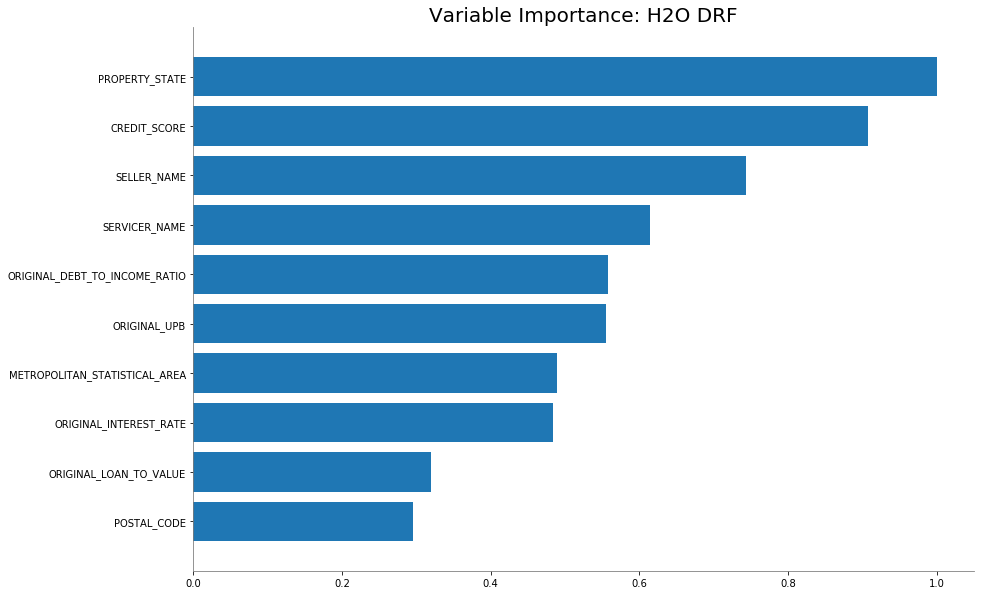

In [61]:
rf.varimp_plot()

In [62]:
rf.model_performance(test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.030996253373301114
RMSE: 0.17605752859023416
LogLoss: 0.13199230669970394
Mean Per-Class Error: 0.24343368064082282
AUC: 0.828849636209264
AUCPR: 0.21692177677742108
Gini: 0.657699272418528

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15746447063982486: 


,,FALSE,TRUE,Error,Rate
0,FALSE,69044.0,3182.0,0.0441,(3182.0/72226.0)
1,TRUE,1718.0,954.0,0.643,(1718.0/2672.0)
2,Total,70762.0,4136.0,0.0654,(4900.0/74898.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.157464,0.280259,185.0
1,max f2,0.075267,0.364653,267.0
2,max f0point5,0.276534,0.292969,114.0
3,max accuracy,0.476778,0.964752,47.0
4,max precision,0.996667,1.000000,0.0
5,max recall,0.000013,1.000000,399.0
6,max specificity,0.996667,1.000000,0.0
7,max absolute_mcc,0.133981,0.256563,204.0
8,max min_per_class_accuracy,0.042232,0.753743,311.0
9,max mean_per_class_accuracy,0.046022,0.756566,305.0



Gains/Lift Table: Avg response rate:  3.57 %, avg score:  3.77 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010000,0.324616,11.713759,11.713759,0.417891,0.433813,0.417891,0.433813,0.117141,0.117141,1071.375906,1071.375906
1,,2,0.020001,0.251877,7.110589,9.412174,0.253672,0.283617,0.335781,0.358715,0.071108,0.188249,611.058857,841.217382
2,,3,0.030001,0.213680,5.127109,7.983819,0.182911,0.232196,0.284824,0.316542,0.051272,0.239521,412.710860,698.381874
3,,4,0.040001,0.186512,5.164533,7.278997,0.184246,0.199657,0.259680,0.287321,0.051647,0.291168,416.453275,627.899725
4,,5,0.050001,0.165986,4.303777,6.683953,0.153538,0.176193,0.238451,0.265095,0.043039,0.334207,330.377729,568.395326
5,,6,0.100003,0.107315,3.136144,4.910049,0.111883,0.132806,0.175167,0.198951,0.156811,0.491018,213.614380,391.004853
6,,7,0.150004,0.079175,2.110722,3.976940,0.075300,0.091532,0.141878,0.163144,0.105539,0.596557,111.072208,297.693971
7,,8,0.201541,0.060000,1.612128,3.372225,0.057513,0.067391,0.120305,0.138659,0.083084,0.679641,61.212769,237.222461
8,,9,0.300008,0.034557,1.033810,2.604721,0.036881,0.045443,0.092924,0.108064,0.101796,0.781437,3.380980,160.472087
9,,10,0.400024,0.021481,0.662319,2.119072,0.023628,0.026312,0.075598,0.087624,0.066243,0.847680,-33.768097,111.907178


In [63]:
glm.model_performance(test)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.03116718384560011
RMSE: 0.17654230044269875
LogLoss: 0.12217234048672272
Null degrees of freedom: 74897
Residual degrees of freedom: 74809
Null deviance: 23061.156287645877
Residual deviance: 18300.927915549117
AIC: 18478.927915549117
AUC: 0.8523169735764535
AUCPR: 0.2007508471305679
Gini: 0.7046339471529071

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13512285831211385: 


,,FALSE,TRUE,Error,Rate
0,FALSE,69111.0,3115.0,0.0431,(3115.0/72226.0)
1,TRUE,1726.0,946.0,0.646,(1726.0/2672.0)
2,Total,70837.0,4061.0,0.0646,(4841.0/74898.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.135123,0.281004,191.0
1,max f2,0.066853,0.384362,260.0
2,max f0point5,0.220291,0.280313,140.0
3,max accuracy,0.922346,0.964311,0.0
4,max precision,0.427153,0.414861,68.0
5,max recall,0.000993,1.000000,398.0
6,max specificity,0.922346,0.999986,0.0
7,max absolute_mcc,0.076089,0.262935,249.0
8,max min_per_class_accuracy,0.039775,0.776659,300.0
9,max mean_per_class_accuracy,0.035376,0.778745,307.0



Gains/Lift Table: Avg response rate:  3.57 %, avg score:  3.60 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010000,0.308103,9.842552,9.842552,0.351135,0.446431,0.351135,0.446431,0.098428,0.098428,884.255155,884.255155
1,,2,0.020001,0.229184,8.083616,8.963084,0.288385,0.263163,0.319760,0.354797,0.080838,0.179266,708.361648,796.308401
2,,3,0.030001,0.187817,6.025288,7.983819,0.214953,0.206554,0.284824,0.305383,0.060254,0.239521,502.528821,698.381874
3,,4,0.040001,0.160582,5.089684,7.260285,0.181575,0.173288,0.259012,0.272359,0.050898,0.290419,408.968445,626.028517
4,,5,0.050001,0.140856,4.528322,6.713893,0.161549,0.150516,0.239519,0.247990,0.045284,0.335704,352.832219,571.389258
5,,6,0.100003,0.087094,3.338234,5.026063,0.119092,0.110015,0.179306,0.179003,0.166916,0.502620,233.823421,402.606339
6,,7,0.150004,0.062865,2.484964,4.179030,0.088652,0.073771,0.149088,0.143925,0.124251,0.626871,148.496358,317.903012
7,,8,0.200005,0.048422,1.751450,3.572135,0.062483,0.055004,0.127437,0.121695,0.087575,0.714446,75.145024,257.213515
8,,9,0.300008,0.031221,1.186346,2.776872,0.042323,0.038832,0.099065,0.094074,0.118638,0.833084,18.634557,177.687196
9,,10,0.399997,0.021524,0.591381,2.230554,0.021098,0.026036,0.079575,0.077066,0.059132,0.892216,-40.861947,123.055381


## Hyperparameter Search

In [64]:
glm_grid = h2o.grid.H2OGridSearch (
    H2OGeneralizedLinearEstimator( 
        family = "binomial",
        lambda_search = True),
    
    hyper_params = {
        "alpha": [x*0.01 for x in range(0, 100)],
        "lambda": [x*1e-6 for x in range(0, 1000)],
        },
    
    grid_id = "glm_grid",
    
    search_criteria = {
        "strategy":"RandomDiscrete",
        "max_models":100,
        "max_runtime_secs":300,
        "seed":42
        }
)
%time glm_grid.train(x=x, y=y, training_frame=train, validation_frame = valid)

glm Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 4.88 s, sys: 509 ms, total: 5.39 s
Wall time: 5min 13s


In [65]:
h2o.ls()

,key
0,default_glm
1,default_random_forest
2,glm_grid
3,glm_grid_model_1
4,glm_grid_model_10
5,glm_grid_model_11
6,glm_grid_model_12
7,glm_grid_model_13
8,glm_grid_model_14
9,glm_grid_model_15


In [31]:
help(h2o.grid.H2OGridSearch)

Help on class H2OGridSearch in module h2o.grid.grid_search:

class H2OGridSearch(H2OGridSearch)
 |  Grid Search of a Hyper-Parameter Space for a Model
 |  
 |  :param model: The type of model to be explored initialized with optional parameters that will be
 |      unchanged across explored models.
 |  :param hyper_params: A dictionary of string parameters (keys) and a list of values to be explored by grid
 |      search (values).
 |  :param str grid_id: The unique id assigned to the resulting grid object. If none is given, an id will
 |      automatically be generated.
 |  :param search_criteria:  The optional dictionary of directives which control the search of the hyperparameter space.
 |      The dictionary can include values for: ``strategy``, ``max_models``, ``max_runtime_secs``, ``stopping_metric``, 
 |      ``stopping_tolerance``, ``stopping_rounds`` and ``seed``. The default strategy, "Cartesian", covers the entire space of 
 |      hyperparameter combinations. If you want to u

In [68]:
glm_grid = h2o.grid.H2OGridSearch (
    H2OGeneralizedLinearEstimator( 
        family = "binomial",
        lambda_search = True),
    
    hyper_params = {
        "alpha": [x*0.01 for x in range(0, 4)],
        "lambda": [x*1e-6 for x in range(0, 4)],
        },
    
    grid_id = "glm_grid_2",
    
)
%time glm_grid.train(x=x, y=y, training_frame=train, validation_frame = valid)

glm Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 1.38 s, sys: 97.1 ms, total: 1.48 s
Wall time: 4.52 s


In [69]:
glm_grid.get_grid(sort_by='auc',decreasing=True)

       alpha    lambda            model_ids                 auc
0     [0.03]  [3.0E-6]  glm_grid_2_model_34  0.8460805841573029
1     [0.02]  [3.0E-6]  glm_grid_2_model_33  0.8460766951403063
2     [0.01]  [3.0E-6]  glm_grid_2_model_32   0.846069611666539
3      [0.0]  [3.0E-6]  glm_grid_2_model_31  0.8460598149855962
4     [0.03]  [2.0E-6]  glm_grid_2_model_24  0.8460568052246162
5     [0.04]  [2.0E-6]  glm_grid_2_model_25  0.8460484731032515
6     [0.04]  [3.0E-6]  glm_grid_2_model_35  0.8460385749696914
7     [0.09]  [2.0E-6]  glm_grid_2_model_30  0.8460272617021874
8     [0.03]  [1.0E-6]  glm_grid_2_model_14  0.8460241739007325
9     [0.02]  [2.0E-6]  glm_grid_2_model_23  0.8460220017741826
10    [0.06]  [2.0E-6]  glm_grid_2_model_27  0.8460174728252922
11    [0.05]  [2.0E-6]  glm_grid_2_model_26   0.846016923940619
12    [0.01]  [2.0E-6]  glm_grid_2_model_22  0.8460082718533074
13     [0.0]  [2.0E-6]  glm_grid_2_model_21  0.8460011285485095
14    [0.07]  [1.0E-6]  glm_grid_2_model

In [70]:
glm_grid.models[0:2]

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_grid_2_model_31


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 3.0E-6 ),"nlambda = 30, lambda.max = 3.3128, lambda.min = 3.0E-6, lambda.1se...",161,161,5,py_9_sid_8dcb




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.03134029361794718
RMSE: 0.1770319000009523
LogLoss: 0.12274902637932963
Null degrees of freedom: 350267
Residual degrees of freedom: 350106
Null deviance: 108932.13150368733
Residual deviance: 85990.11194367008
AIC: 86314.11194367008
AUC: 0.8521796674408533
AUCPR: 0.2108009154379545
Gini: 0.7043593348817065

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14040484764968156: 


,,FALSE,TRUE,Error,Rate
0,FALSE,323803.0,13804.0,0.0409,(13804.0/337607.0)
1,TRUE,8140.0,4521.0,0.6429,(8140.0/12661.0)
2,Total,331943.0,18325.0,0.0626,(21944.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.140405,0.291809,201.0
1,max f2,0.062948,0.389545,274.0
2,max f0point5,0.218027,0.290306,153.0
3,max accuracy,0.981803,0.963851,0.0
4,max precision,0.631806,0.423888,33.0
5,max recall,0.000522,1.000000,399.0
6,max specificity,0.981803,0.999997,0.0
7,max absolute_mcc,0.097471,0.269922,236.0
8,max min_per_class_accuracy,0.038255,0.773062,308.0
9,max mean_per_class_accuracy,0.036297,0.775813,311.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.61 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010001,0.334095,10.685383,10.685383,0.386240,0.468449,0.386240,0.468449,0.106864,0.106864,968.538349,968.538349
1,,2,0.020002,0.242419,7.660622,9.173003,0.276906,0.281737,0.331573,0.375093,0.076613,0.183477,666.062231,817.300290
2,,3,0.030003,0.195927,6.444400,8.263469,0.232943,0.217466,0.298696,0.322551,0.064450,0.247927,544.439980,726.346853
3,,4,0.040001,0.165257,5.229670,7.505181,0.189035,0.179640,0.271287,0.286831,0.052287,0.300213,422.967020,650.518134
4,,5,0.050002,0.143570,4.651656,6.934444,0.168142,0.153874,0.250657,0.260238,0.046521,0.346734,365.165623,593.444373
5,,6,0.100001,0.087524,3.355262,5.144904,0.121281,0.110998,0.185971,0.185620,0.167759,0.514493,235.526185,414.490388
6,,7,0.150002,0.062033,2.399412,4.229723,0.086731,0.073490,0.152890,0.148243,0.119975,0.634468,139.941231,322.972261
7,,8,0.200001,0.047252,1.638139,3.581845,0.059213,0.054078,0.129472,0.124702,0.081905,0.716373,63.813867,258.184512
8,,9,0.300002,0.030364,1.116809,2.760166,0.040369,0.037862,0.099771,0.095756,0.111682,0.828055,11.680904,176.016643
9,,10,0.399999,0.020755,0.635825,2.229093,0.022983,0.025172,0.080574,0.078110,0.063581,0.891636,-36.417472,122.909251




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.031009812776927773
RMSE: 0.17609603282563685
LogLoss: 0.12240626298695798
Null degrees of freedom: 74970
Residual degrees of freedom: 74809
Null deviance: 22974.597464481732
Residual deviance: 18353.839884790454
AIC: 18677.839884790454
AUC: 0.8460598149855962
AUCPR: 0.2013492666317292
Gini: 0.6921196299711925

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13087782553898372: 


,,FALSE,TRUE,Error,Rate
0,FALSE,68995.0,3318.0,0.0459,(3318.0/72313.0)
1,TRUE,1676.0,982.0,0.6305,(1676.0/2658.0)
2,Total,70671.0,4300.0,0.0666,(4994.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.130878,0.282265,204.0
1,max f2,0.056964,0.377061,281.0
2,max f0point5,0.240409,0.294979,139.0
3,max accuracy,0.974480,0.964533,0.0
4,max precision,0.434960,0.399471,73.0
5,max recall,0.000715,1.000000,398.0
6,max specificity,0.974480,0.999986,0.0
7,max absolute_mcc,0.108228,0.261668,224.0
8,max min_per_class_accuracy,0.037407,0.765989,308.0
9,max mean_per_class_accuracy,0.034511,0.767543,313.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.61 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010004,0.334666,10.831025,10.831025,0.384000,0.475262,0.384000,0.475262,0.108352,0.108352,983.102483,983.102483
1,,2,0.020008,0.244113,8.311307,9.571166,0.294667,0.283665,0.339333,0.379463,0.083145,0.191497,731.130725,857.116604
2,,3,0.030012,0.193499,5.528336,8.223556,0.196000,0.216238,0.291556,0.325055,0.055305,0.246802,452.833559,722.355589
3,,4,0.040002,0.163207,4.970848,7.411192,0.176235,0.177140,0.262754,0.288113,0.049661,0.296464,397.084751,641.119224
4,,5,0.050006,0.142152,4.099242,6.748626,0.145333,0.152223,0.239264,0.260928,0.041008,0.337472,309.924204,574.862552
5,,6,0.100012,0.087059,3.355504,5.052065,0.118965,0.110130,0.179114,0.185529,0.167795,0.505267,235.550388,405.206470
6,,7,0.150005,0.061801,2.242616,4.115749,0.079509,0.073209,0.145919,0.148096,0.112114,0.617381,124.261648,311.574850
7,,8,0.200011,0.047582,1.685275,3.508090,0.059749,0.054193,0.124375,0.124619,0.084274,0.701655,68.527549,250.808973
8,,9,0.300009,0.030238,1.083536,2.699941,0.038415,0.037981,0.095723,0.095741,0.108352,0.810008,8.353590,169.994105
9,,10,0.400008,0.020618,0.718595,2.204621,0.025477,0.025048,0.078162,0.078068,0.071859,0.881866,-28.140501,120.462105




Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
0,,2020-02-27 20:38:57,0.000 sec,5,.3E-5,162,0.245498,0.244813


Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_grid_2_model_32


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.01, lambda = 3.0E-6 )","nlambda = 100, lambda.max = 3.3128, lambda.min = 3.0E-6, lambda.1s...",161,161,5,py_9_sid_8dcb




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.03134029569256743
RMSE: 0.17703190586040538
LogLoss: 0.12274903495752079
Null degrees of freedom: 350267
Residual degrees of freedom: 350106
Null deviance: 108932.13150368733
Residual deviance: 85990.11795300177
AIC: 86314.11795300177
AUC: 0.8522061632955135
AUCPR: 0.21078821181705734
Gini: 0.7044123265910269

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13957843680312448: 


,,FALSE,TRUE,Error,Rate
0,FALSE,323690.0,13917.0,0.0412,(13917.0/337607.0)
1,TRUE,8122.0,4539.0,0.6415,(8122.0/12661.0)
2,Total,331812.0,18456.0,0.0629,(22039.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.139578,0.291738,203.0
1,max f2,0.064727,0.389686,271.0
2,max f0point5,0.218001,0.290371,155.0
3,max accuracy,0.981801,0.963851,0.0
4,max precision,0.633877,0.422803,33.0
5,max recall,0.000518,1.000000,399.0
6,max specificity,0.981801,0.999997,0.0
7,max absolute_mcc,0.104003,0.270044,231.0
8,max min_per_class_accuracy,0.038233,0.773281,310.0
9,max mean_per_class_accuracy,0.037004,0.775917,312.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.61 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010001,0.334088,10.685383,10.685383,0.386240,0.468446,0.386240,0.468446,0.106864,0.106864,968.538349,968.538349
1,,2,0.020002,0.242409,7.660622,9.173003,0.276906,0.281735,0.331573,0.375090,0.076613,0.183477,666.062231,817.300290
2,,3,0.030003,0.195927,6.444400,8.263469,0.232943,0.217465,0.298696,0.322549,0.064450,0.247927,544.439980,726.346853
3,,4,0.040001,0.165264,5.229670,7.505181,0.189035,0.179639,0.271287,0.286829,0.052287,0.300213,422.967020,650.518134
4,,5,0.050002,0.143572,4.643759,6.932864,0.167856,0.153874,0.250600,0.260236,0.046442,0.346655,364.375868,593.286413
5,,6,0.100001,0.087522,3.356842,5.144904,0.121338,0.110998,0.185971,0.185619,0.167838,0.514493,235.684154,414.490388
6,,7,0.150002,0.062034,2.399412,4.229723,0.086731,0.073490,0.152890,0.148242,0.119975,0.634468,139.941231,322.972261
7,,8,0.200001,0.047251,1.638139,3.581845,0.059213,0.054078,0.129472,0.124702,0.081905,0.716373,63.813867,258.184512
8,,9,0.300002,0.030365,1.116809,2.760166,0.040369,0.037863,0.099771,0.095755,0.111682,0.828055,11.680904,176.016643
9,,10,0.399999,0.020757,0.635825,2.229093,0.022983,0.025172,0.080574,0.078110,0.063581,0.891636,-36.417472,122.909251




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.0310098137389648
RMSE: 0.17609603555720613
LogLoss: 0.12240628503460828
Null degrees of freedom: 74970
Residual degrees of freedom: 74809
Null deviance: 22974.597464481732
Residual deviance: 18353.843190659238
AIC: 18677.843190659238
AUC: 0.846069611666539
AUCPR: 0.20133398986177273
Gini: 0.6921392233330781

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12022414073630618: 


,,FALSE,TRUE,Error,Rate
0,FALSE,68475.0,3838.0,0.0531,(3838.0/72313.0)
1,TRUE,1591.0,1067.0,0.5986,(1591.0/2658.0)
2,Total,70066.0,4905.0,0.0724,(5429.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.120224,0.282163,212.0
1,max f2,0.056888,0.376917,278.0
2,max f0point5,0.241791,0.295119,138.0
3,max accuracy,0.974476,0.964533,0.0
4,max precision,0.434957,0.399471,73.0
5,max recall,0.000533,1.000000,399.0
6,max specificity,0.974476,0.999986,0.0
7,max absolute_mcc,0.108221,0.261612,222.0
8,max min_per_class_accuracy,0.037246,0.765215,307.0
9,max mean_per_class_accuracy,0.033745,0.768396,313.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.61 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010004,0.334693,10.831025,10.831025,0.384000,0.475258,0.384000,0.475258,0.108352,0.108352,983.102483,983.102483
1,,2,0.020008,0.244102,8.311307,9.571166,0.294667,0.283664,0.339333,0.379461,0.083145,0.191497,731.130725,857.116604
2,,3,0.030012,0.193485,5.528336,8.223556,0.196000,0.216236,0.291556,0.325053,0.055305,0.246802,452.833559,722.355589
3,,4,0.040002,0.163211,4.970848,7.411192,0.176235,0.177140,0.262754,0.288111,0.049661,0.296464,397.084751,641.119224
4,,5,0.050006,0.142156,4.099242,6.748626,0.145333,0.152223,0.239264,0.260927,0.041008,0.337472,309.924204,574.862552
5,,6,0.100012,0.087059,3.355504,5.052065,0.118965,0.110130,0.179114,0.185528,0.167795,0.505267,235.550388,405.206470
6,,7,0.150005,0.061802,2.242616,4.115749,0.079509,0.073209,0.145919,0.148095,0.112114,0.617381,124.261648,311.574850
7,,8,0.200011,0.047583,1.685275,3.508090,0.059749,0.054193,0.124375,0.124618,0.084274,0.701655,68.527549,250.808973
8,,9,0.300009,0.030237,1.083536,2.699941,0.038415,0.037981,0.095723,0.095741,0.108352,0.810008,8.353590,169.994105
9,,10,0.400008,0.020619,0.718595,2.204621,0.025477,0.025049,0.078162,0.078068,0.071859,0.881866,-28.140501,120.462105




Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
0,,2020-02-27 20:39:00,0.000 sec,5,.3E-5,162,0.245498,0.244813


[, ]

In [198]:
glm_grid.summary()


Grid Summary:



Model Id,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
glm_grid_2_model_31,binomial,logit,Ridge ( lambda = 3.0E-6 ),"nlambda = 30, lambda.max = 3.3128, lambda.min = 3.0E-6, lambda.1se = -1.0",161,161,5,py_9_sid_8dcb
glm_grid_2_model_32,binomial,logit,"Elastic Net (alpha = 0.01, lambda = 3.0E-6 )","nlambda = 100, lambda.max = 3.3128, lambda.min = 3.0E-6, lambda.1se = -1.0",161,161,5,py_9_sid_8dcb
glm_grid_2_model_33,binomial,logit,"Elastic Net (alpha = 0.02, lambda = 3.0E-6 )","nlambda = 100, lambda.max = 1.6564, lambda.min = 3.0E-6, lambda.1se = -1.0",161,161,5,py_9_sid_8dcb
glm_grid_2_model_34,binomial,logit,"Elastic Net (alpha = 0.03, lambda = 3.0E-6 )","nlambda = 100, lambda.max = 1.1043, lambda.min = 3.0E-6, lambda.1se = -1.0",161,161,5,py_9_sid_8dcb
glm_grid_2_model_35,binomial,logit,"Elastic Net (alpha = 0.04, lambda = 3.0E-6 )","nlambda = 100, lambda.max = 0.8282, lambda.min = 3.0E-6, lambda.1se = -1.0",161,160,5,py_9_sid_8dcb
glm_grid_2_model_23,binomial,logit,"Elastic Net (alpha = 0.02, lambda = 2.0E-6 )","nlambda = 100, lambda.max = 1.6564, lambda.min = 2.0E-6, lambda.1se = -1.0",161,161,5,py_9_sid_8dcb
glm_grid_2_model_28,binomial,logit,"Elastic Net (alpha = 0.07, lambda = 2.0E-6 )","nlambda = 100, lambda.max = 0.4733, lambda.min = 2.0E-6, lambda.1se = -1.0",161,161,5,py_9_sid_8dcb
glm_grid_2_model_29,binomial,logit,"Elastic Net (alpha = 0.08, lambda = 2.0E-6 )","nlambda = 100, lambda.max = 0.4141, lambda.min = 2.0E-6, lambda.1se = -1.0",161,159,5,py_9_sid_8dcb
glm_grid_2_model_26,binomial,logit,"Elastic Net (alpha = 0.05, lambda = 2.0E-6 )","nlambda = 100, lambda.max = 0.6626, lambda.min = 2.0E-6, lambda.1se = -1.0",161,160,5,py_9_sid_8dcb
glm_grid_2_model_21,binomial,logit,Ridge ( lambda = 2.0E-6 ),"nlambda = 30, lambda.max = 3.3128, lambda.min = 2.0E-6, lambda.1se = -1.0",161,161,5,py_9_sid_8dcb


In [79]:
sorted_glm_grid = glm_grid.get_grid(sort_by='auc',decreasing=True)
sorted_glm_grid

       alpha    lambda            model_ids                 auc
0     [0.03]  [3.0E-6]  glm_grid_2_model_34  0.8460805841573029
1     [0.02]  [3.0E-6]  glm_grid_2_model_33  0.8460766951403063
2     [0.01]  [3.0E-6]  glm_grid_2_model_32   0.846069611666539
3      [0.0]  [3.0E-6]  glm_grid_2_model_31  0.8460598149855962
4     [0.03]  [2.0E-6]  glm_grid_2_model_24  0.8460568052246162
5     [0.04]  [2.0E-6]  glm_grid_2_model_25  0.8460484731032515
6     [0.04]  [3.0E-6]  glm_grid_2_model_35  0.8460385749696914
7     [0.09]  [2.0E-6]  glm_grid_2_model_30  0.8460272617021874
8     [0.03]  [1.0E-6]  glm_grid_2_model_14  0.8460241739007325
9     [0.02]  [2.0E-6]  glm_grid_2_model_23  0.8460220017741826
10    [0.06]  [2.0E-6]  glm_grid_2_model_27  0.8460174728252922
11    [0.05]  [2.0E-6]  glm_grid_2_model_26   0.846016923940619
12    [0.01]  [2.0E-6]  glm_grid_2_model_22  0.8460082718533074
13     [0.0]  [2.0E-6]  glm_grid_2_model_21  0.8460011285485095
14    [0.07]  [1.0E-6]  glm_grid_2_model

In [84]:
sorted_glm_grid[0].actual_params

{'model_id': 'glm_grid_2_model_34',
 'training_frame': 'py_9_sid_8dcb',
 'validation_frame': 'py_10_sid_8dcb',
 'nfolds': 0,
 'seed': -7485589137662077887,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'fold_assignment': 'AUTO',
 'fold_column': None,
 'response_column': 'DELINQUENT',
 'ignored_columns': ['PREPAYMENT_PENALTY_MORTGAGE_FLAG',
  'PREPAID',
  'PRODUCT_TYPE'],
 'random_columns': None,
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'offset_column': None,
 'weights_column': None,
 'family': 'binomial',
 'rand_family': None,
 'tweedie_variance_power': 0.0,
 'tweedie_link_power': 1.0,
 'theta': 1e-10,
 'solver': 'COORDINATE_DESCENT',
 'alpha': [0.03],
 'lambda': [3e-06],
 'lambda_search': True,
 'early_stopping': True,
 'nlambdas': 100,
 'standardize': True,
 'missing_values_handling': 'MeanImputation',
 'plug_values': None,
 'compute_p_values': False,
 'remove_collinear_columns

In [85]:
print(sorted_glm_grid[0].F1())
sorted_glm_grid[1].F1()

[[0.14008830180774537, 0.291888062345023]]


[[0.14058503366975075, 0.2917164926796161]]

In [86]:
print(sorted_glm_grid[0].confusion_matrix())


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14008830180774537: 


,,FALSE,TRUE,Error,Rate
0,FALSE,323747.0,13860.0,0.0411,(13860.0/337607.0)
1,TRUE,8129.0,4532.0,0.6421,(8129.0/12661.0)
2,Total,331876.0,18392.0,0.0628,(21989.0/350268.0)


In [87]:
sorted_glm_grid[0].model_performance(test) # should give AUC of 0.8524 compared to the untuned version of 0.8523


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.031147373309292722
RMSE: 0.17648618447145578
LogLoss: 0.1219969846722507
Null degrees of freedom: 74897
Residual degrees of freedom: 74736
Null deviance: 23061.156287645877
Residual deviance: 18274.660315964466
AIC: 18598.660315964466
AUC: 0.8524853753504261
AUCPR: 0.2026351548079284
Gini: 0.7049707507008522

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13102288803308665: 


,,FALSE,TRUE,Error,Rate
0,FALSE,68867.0,3359.0,0.0465,(3359.0/72226.0)
1,TRUE,1680.0,992.0,0.6287,(1680.0/2672.0)
2,Total,70547.0,4351.0,0.0673,(5039.0/74898.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.131023,0.282500,203.0
1,max f2,0.066955,0.388359,266.0
2,max f0point5,0.207459,0.280060,153.0
3,max accuracy,0.939508,0.964311,0.0
4,max precision,0.604532,0.448276,33.0
5,max recall,0.000944,1.000000,398.0
6,max specificity,0.939508,0.999986,0.0
7,max absolute_mcc,0.079921,0.264469,250.0
8,max min_per_class_accuracy,0.038429,0.774790,308.0
9,max mean_per_class_accuracy,0.032771,0.777684,318.0



Gains/Lift Table: Avg response rate:  3.57 %, avg score:  3.60 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010000,0.323959,9.992248,9.992248,0.356475,0.466052,0.356475,0.466052,0.099925,0.099925,899.224815,899.224815
1,,2,0.020001,0.238193,7.784223,8.888236,0.277704,0.277149,0.317089,0.371601,0.077844,0.177769,678.422328,788.823571
2,,3,0.030001,0.194789,6.137561,7.971344,0.218959,0.215194,0.284379,0.319465,0.061377,0.239147,513.756066,697.134403
3,,4,0.040001,0.164694,5.351654,7.316421,0.190921,0.178553,0.261015,0.284237,0.053518,0.292665,435.165350,631.642140
4,,5,0.050001,0.143261,4.341201,6.721377,0.154873,0.153613,0.239786,0.258112,0.043413,0.336078,334.120144,572.137741
5,,6,0.100003,0.087611,3.428052,5.074715,0.122296,0.111022,0.181041,0.184567,0.171407,0.507485,242.805217,407.471479
6,,7,0.150004,0.062122,2.514903,4.221444,0.089720,0.073484,0.150601,0.147539,0.125749,0.633234,151.490290,322.144416
7,,8,0.200005,0.047362,1.616723,3.570264,0.057677,0.054207,0.127370,0.124206,0.080838,0.714072,61.672330,257.026394
8,,9,0.300008,0.030204,1.182603,2.774377,0.042190,0.037810,0.098976,0.095408,0.118263,0.832335,18.260315,177.437701
9,,10,0.399997,0.020579,0.587638,2.227747,0.020964,0.025006,0.079475,0.077809,0.058757,0.891093,-41.236238,122.774691


In [226]:
2*0.852 - 1

0.704

## AutoML
http://docs.h2o.ai/h2o/latest-stable/h2o-r/docs/reference/h2o.automl.html

#### The models are ranked by a default metric based on the problem type (the second column of the leaderboard). In binary classification problems, that metric is AUC, and in multiclass classification problems, the metric is mean per-class error. In regression problems, the default sort metric is deviance. Some additional metrics are also provided, for convenience.

In [199]:
# Binary classification, AutoML finds the best algorithm and model

from h2o.automl import H2OAutoML, get_leaderboard

# Import a sample binary outcome train/test set into H2O
# https://archive.ics.uci.edu/ml/datasets/HIGGS
#The data has been produced using Monte Carlo simulations. The first 21 features (columns 2-22) are kinematic properties 
#measured by the particle detectors in the accelerator. The last seven features are functions of the first 21 
#features; these are high-level features derived by physicists to help discriminate between the two classes. 
#There is an interest in using deep learning methods to obviate the need for physicists to manually develop such features.
# Target variable is binray, 0 for background noise, 1 for signal
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
# max_runtime_secs - maximum runtime for automl, default is set to 1 hour
# balance_classes - Set to True to over or undersample the classes to balance it
# modeling_plan - can pass a list of models to try out, the result of aml.modeling_steps can be passed back to it during initialization
# sort_metric - 'auc', 'aucpr' etc.
# export_checkpoints_dir - provide the name of the folder to checkpoint the model
# include_algos - algorithm to use, "DRF", "DeepLearning", "XGBoost" etc
# exclude_algos - exclude certain algorithms

aml = H2OAutoML(max_models=20, seed=1, project_name="First")
aml.train(x=x, y=y, training_frame=train) # provide data and response column names from the train H20 dataframe

# AutoML Leaderboard
lb = aml.leaderboard

# Optionally edd extra model information to the leaderboard
lb = get_leaderboard(aml, extra_columns='ALL')

# Print all rows (instead of default 10 rows)
lb.head(rows=lb.nrows)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
StackedEnsemble_BestOfFamily_AutoML_20200229_034307,0.790188,0.550787,0.806415,0.311818,0.431834,0.18648,8537,0.751123
StackedEnsemble_AllModels_AutoML_20200229_034307,0.79011,0.551103,0.806886,0.31913,0.43196,0.18659,21427,2.09653
XGBoost_3_AutoML_20200229_034307,0.786708,0.555684,0.804735,0.317438,0.433971,0.188331,3830,0.015087
XGBoost_grid__1_AutoML_20200229_034307_model_3,0.785959,0.557668,0.803676,0.324007,0.434596,0.188874,4128,0.015467
XGBoost_grid__1_AutoML_20200229_034307_model_4,0.782749,0.558526,0.800769,0.311874,0.43555,0.189703,3322,0.01146
GBM_5_AutoML_20200229_034307,0.78219,0.558353,0.800234,0.319658,0.435512,0.18967,5553,0.240581
XGBoost_2_AutoML_20200229_034307,0.782155,0.557366,0.801728,0.337128,0.435331,0.189514,9406,0.019689
XGBoost_grid__1_AutoML_20200229_034307_model_1,0.782142,0.560727,0.799441,0.324183,0.436255,0.190319,7018,0.012354
XGBoost_1_AutoML_20200229_034307,0.7819,0.557833,0.801298,0.33284,0.435508,0.189667,5933,0.016334
GBM_2_AutoML_20200229_034307,0.777673,0.562514,0.796181,0.334056,0.437583,0.191479,4561,0.2455


In [221]:
train.describe()

Rows:10000
Cols:29




,response,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
type,enum,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,,0.2750626504421234,-2.425236463546753,-1.7425082921981812,0.012355248443782328,-1.7437547445297241,0.15948815643787384,-2.9410083293914795,-1.7412374019622803,0.0,0.189988374710083,-2.910175323486328,-1.7423716783523557,0.0,0.26360762119293213,-2.727842330932617,-1.7420687675476072,0.0,0.36535415053367615,-2.496431827545166,-1.7421357631683347,0.0,0.1722409576177597,0.34246698021888733,0.46118336915969854,0.384410560131073,0.08098646253347397,0.38877949118614197,0.4449557662010193
mean,,0.9979236403375864,-0.016680663833495066,-0.0034857744504741277,0.9913848843651824,-0.009822067860461522,0.9920579565405846,-0.0014677957667277976,0.0037509448854136282,1.00493906686306,0.9877106610402465,-0.020984136478627995,-0.00016777858562709903,0.9810776063561439,0.9945834684580565,0.013843917558944673,0.007515283621835988,1.0034907880783084,0.97978388197124,0.0012221027551102396,-0.014788587855815424,0.9991417586565018,1.0291478910103438,1.021455474603176,1.0508769570112229,1.0125336340218787,0.9677125638335943,1.0312243017762897,0.9578644521445038
maxs,,6.695387840270996,2.4299979209899902,1.7432359457015991,5.824007034301758,1.7428184747695923,7.064657211303711,2.9696741104125977,1.741453766822815,2.1730761528015137,5.192512035369873,2.9093241691589355,1.7431747913360596,2.214872121810913,6.523279190063477,2.7272779941558842,1.741774320602417,2.548224449157715,6.067653179168701,2.4955105781555176,1.7428174018859863,3.101961374282837,13.098125457763672,7.3919677734375,3.6822597980499268,6.5831212997436515,8.255083084106445,4.749468803405762,4.3163652420043945
sigma,,0.5749652323165785,1.0029429816464286,1.0108375148072333,0.59546048128496,1.004827635002585,0.47740822779756953,1.0041150858680707,1.0159068205331792,1.0269649157432101,0.4899343832646299,1.009461647840542,1.0053419750816672,1.045674383534585,0.485816821742571,1.0169739644992715,0.9970667134235766,1.1953415446637299,0.4991268289853618,1.0054594863334043,1.0009981151815668,1.3969915502672692,0.6372254799960355,0.36962268165272505,0.1659393548346413,0.40492650011247683,0.523194789843795,0.36622010143683376,0.3133368626304032
zeros,,0,0,0,0,0,0,0,0,4870,0,0,0,5093,0,0,0,5688,0,0,0,6468,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1,0.869293212890625,-0.6350818276405334,0.22569026052951813,0.327470064163208,-0.6899932026863098,0.7542022466659546,-0.24857313930988315,-1.0920639038085938,0.0,1.3749921321868896,-0.6536741852760315,0.9303491115570068,1.1074360609054565,1.138904333114624,-1.5781983137130735,-1.046985387802124,0.0,0.6579295396804808,-0.010454569943249226,-0.0457671694457531,3.101961374282837,1.353760004043579,0.9795631170272827,0.978076159954071,0.9200048446655273,0.7216574549674988,0.9887509346008301,0.8766783475875854
1,1,0.9075421094894409,0.3291472792625427,0.3594118654727936,1.4979698657989502,-0.3130095303058624,1.09553062915802,-0.5575249195098877,-1.5882297754287722,2.1730761528015137,0.8125811815261841,-0.2136419266462326,1.2710145711898804,2.214872121810913,0.4999939501285553,-1.2614318132400513,0.7321561574935913,0.0,0.39870089292526245,-1.138930082321167,-0.0008191101951524615,0.0,0.3022198975086212,0.8330481648445129,0.9856996536254883,0.9780983924865723,0.7797321677207947,0.9923557639122009,0.7983425855636597
2,1,0.7988347411155701,1.4706387519836426,-1.6359747648239136,0.45377317070961,0.4256291687488556,1.104874610900879,1.2823222875595093,1.3816642761230469,0.0,0.8517372012138367,1.540658950805664,-0.8196895122528076,2.214872121810913,0.9934899210929871,0.3560801148414612,-0.2087775468826294,2.548224449157715,1.256954550743103,1.128847599029541,0.9004608392715454,0.0,0.9097532629966736,1.108330488204956,0.9856922030448914,0.9513312578201294,0.80325150

In [225]:
train['response']

response
1
1
1
0
1
0
1
1
1
1


### Look at the object returned by AutoML

In [90]:
help(aml)

Help on H2OAutoML in module h2o.automl.autoh2o object:

class H2OAutoML(h2o.base.Keyed)
 |  Automatic Machine Learning
 |  
 |  The Automatic Machine Learning (AutoML) function automates the supervised machine learning model training process.
 |  The current version of AutoML trains and cross-validates 
 |  a Random Forest (DRF), 
 |  an Extremely-Randomized Forest (DRF/XRT),
 |  a random grid of Generalized Linear Models (GLM)
 |  a random grid of XGBoost (XGBoost),
 |  a random grid of Gradient Boosting Machines (GBM), 
 |  a random grid of Deep Neural Nets (DeepLearning), 
 |  and 2 Stacked Ensembles, one of all the models, and one of only the best models of each kind.
 |  
 |  :examples:
 |  >>> import h2o
 |  >>> from h2o.automl import H2OAutoML
 |  >>> h2o.init()
 |  >>> # Import a sample binary outcome train/test set into H2O
 |  >>> train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
 |  >>> test = h2o.import_file("https://s3.amazonaws.com/er

In [36]:
aml.modeling_steps

[{'name': 'XGBoost',
  'steps': [{'id': 'def_1', 'weight': 10},
   {'id': 'def_2', 'weight': 10},
   {'id': 'def_3', 'weight': 10}]},
 {'name': 'GLM', 'steps': [{'id': 'def_1', 'weight': 10}]},
 {'name': 'DRF', 'steps': [{'id': 'def_1', 'weight': 10}]},
 {'name': 'GBM',
  'steps': [{'id': 'def_1', 'weight': 10},
   {'id': 'def_2', 'weight': 10},
   {'id': 'def_3', 'weight': 10},
   {'id': 'def_4', 'weight': 10},
   {'id': 'def_5', 'weight': 10}]},
 {'name': 'DeepLearning', 'steps': [{'id': 'def_1', 'weight': 10}]},
 {'name': 'DRF', 'steps': [{'id': 'XRT', 'weight': 10}]},
 {'name': 'XGBoost', 'steps': [{'id': 'grid_1', 'weight': 100}]},
 {'name': 'GBM', 'steps': [{'id': 'grid_1', 'weight': 60}]},
 {'name': 'DeepLearning',
  'steps': [{'id': 'grid_1', 'weight': 20}, {'id': 'grid_2', 'weight': 20}]},
 {'name': 'StackedEnsemble',
  'steps': [{'id': 'best', 'weight': 10}, {'id': 'all', 'weight': 10}]}]

In [37]:
aml.training_info

{'creation_epoch': '1580835566',
 'start_epoch': '1580835566',
 'stop_epoch': '1580836195',
 'duration_secs': '629'}

In [96]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20200227_204508,0.789982,0.550739,0.805625,0.310377,0.431895,0.186533
StackedEnsemble_AllModels_AutoML_20200227_204508,0.7899,0.551081,0.805393,0.313153,0.43203,0.18665
XGBoost_3_AutoML_20200227_204508,0.786708,0.555684,0.804735,0.317438,0.433971,0.188331
XGBoost_grid__1_AutoML_20200227_204508_model_3,0.785959,0.557668,0.803676,0.324007,0.434596,0.188874
XGBoost_grid__1_AutoML_20200227_204508_model_4,0.782749,0.558526,0.800769,0.311874,0.43555,0.189703
GBM_5_AutoML_20200227_204508,0.78219,0.558353,0.800234,0.319658,0.435512,0.18967
XGBoost_2_AutoML_20200227_204508,0.782155,0.557366,0.801728,0.337128,0.435331,0.189514
XGBoost_grid__1_AutoML_20200227_204508_model_1,0.782142,0.560727,0.799441,0.324183,0.436255,0.190319
XGBoost_1_AutoML_20200227_204508,0.7819,0.557833,0.801298,0.33284,0.435508,0.189667
GBM_2_AutoML_20200227_204508,0.777673,0.562514,0.796181,0.334056,0.437583,0.191479


In [113]:
# Get the leader or the best-performing model
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_AutoML_20200227_204508

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.11925875029004498
RMSE: 0.3453386023746042
LogLoss: 0.39286535425308083
Null degrees of freedom: 9999
Residual degrees of freedom: 9993
Null deviance: 13828.113387424273
Residual deviance: 7857.307085061617
AIC: 7871.307085061617
AUC: 0.9316719701280156
AUCPR: 0.9393454317301558
Gini: 0.8633439402560312

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4320884656174638: 


,,0,1,Error,Rate
0,0,3581.0,1124.0,0.2389,(1124.0/4705.0)
1,1,438.0,4857.0,0.0827,(438.0/5295.0)
2,Total,4019.0,5981.0,0.1562,(1562.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.432088,0.861476,234.0
1,max f2,0.331584,0.913694,279.0
2,max f0point5,0.609219,0.875282,158.0
3,max accuracy,0.489252,0.849200,210.0
4,max precision,0.947307,1.000000,0.0
5,max recall,0.127844,1.000000,365.0
6,max specificity,0.947307,1.000000,0.0
7,max absolute_mcc,0.489252,0.697125,210.0
8,max min_per_class_accuracy,0.517215,0.845484,199.0
9,max mean_per_class_accuracy,0.489252,0.847785,210.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.49 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.925789,1.888574,1.888574,1.000,0.933018,1.000000,0.933018,0.018886,0.018886,88.857413,88.857413
1,,2,0.02,0.917961,1.888574,1.888574,1.000,0.921319,1.000000,0.927168,0.018886,0.037771,88.857413,88.857413
2,,3,0.03,0.911376,1.888574,1.888574,1.000,0.914519,1.000000,0.922952,0.018886,0.056657,88.857413,88.857413
3,,4,0.04,0.906006,1.888574,1.888574,1.000,0.908459,1.000000,0.919329,0.018886,0.075543,88.857413,88.857413
4,,5,0.05,0.902017,1.888574,1.888574,1.000,0.904031,1.000000,0.916269,0.018886,0.094429,88.857413,88.857413
5,,6,0.10,0.877282,1.884797,1.886686,0.998,0.889705,0.999000,0.902987,0.094240,0.188669,88.479698,88.668555
6,,7,0.15,0.849377,1.873466,1.882279,0.992,0.863744,0.996667,0.889906,0.093673,0.282342,87.346553,88.227888
7,,8,0.20,0.815488,1.835694,1.870633,0.972,0.833029,0.990500,0.875687,0.091785,0.374127,83.569405,87.063267
8,,9,0.30,0.738691,1.724268,1.821845,0.913,0.778867,0.964667,0.843413,0.172427,0.546553,72.426818,82.184451
9,,10,0.40,0.644625,1.535411,1.750236,0.813,0.691522,0.926750,0.805441,0.153541,0.700094,53.541076,75.023607




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.18653329394705204
RMSE: 0.4318950033828269
LogLoss: 0.5507387369390513
Null degrees of freedom: 9999
Residual degrees of freedom: 9994
Null deviance: 13829.717313823481
Residual deviance: 11014.774738781027
AIC: 11026.774738781027
AUC: 0.7899824288347739
AUCPR: 0.805625210876482
Gini: 0.5799648576695478

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37554281389148014: 


,,0,1,Error,Rate
0,0,2473.0,2232.0,0.4744,(2232.0/4705.0)
1,1,775.0,4520.0,0.1464,(775.0/5295.0)
2,Total,3248.0,6752.0,0.3007,(3007.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.375543,0.750394,264.0
1,max f2,0.192164,0.861043,344.0
2,max f0point5,0.590501,0.741941,166.0
3,max accuracy,0.530208,0.715200,193.0
4,max precision,0.945260,1.000000,0.0
5,max recall,0.069633,1.000000,392.0
6,max specificity,0.945260,1.000000,0.0
7,max absolute_mcc,0.577554,0.433231,172.0
8,max min_per_class_accuracy,0.525787,0.714070,195.0
9,max mean_per_class_accuracy,0.577554,0.716190,172.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.95 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.925590,1.850803,1.850803,0.980,0.932440,0.980000,0.932440,0.018508,0.018508,85.080264,85.080264
1,,2,0.02,0.916468,1.813031,1.831917,0.960,0.920909,0.970000,0.926674,0.018130,0.036638,81.303116,83.191690
2,,3,0.03,0.909287,1.831917,1.831917,0.970,0.912848,0.970000,0.922066,0.018319,0.054958,83.191690,83.191690
3,,4,0.04,0.901913,1.756374,1.813031,0.930,0.905510,0.960000,0.917927,0.017564,0.072521,75.637394,81.303116
4,,5,0.05,0.895690,1.775260,1.805477,0.940,0.898703,0.956000,0.914082,0.017753,0.090274,77.525968,80.547686
5,,6,0.10,0.865029,1.673277,1.739377,0.886,0.881260,0.921000,0.897671,0.083664,0.173938,67.327668,73.937677
6,,7,0.15,0.832528,1.635505,1.704753,0.866,0.849469,0.902667,0.881604,0.081775,0.255713,63.550519,70.475291
7,,8,0.20,0.797104,1.541076,1.663834,0.816,0.814637,0.881000,0.864862,0.077054,0.332767,54.107649,66.383381
8,,9,0.30,0.717192,1.391879,1.573182,0.737,0.758051,0.833000,0.829258,0.139188,0.471955,39.187913,57.318225
9,,10,0.40,0.631165,1.223796,1.485836,0.648,0.675509,0.786750,0.790821,0.122380,0.594334,22.379603,48.583569


In [114]:
# Get the performance of the leading model on the test set
aml.leader.model_performance(test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.18610211174726818
RMSE: 0.4313955397860161
LogLoss: 0.5507433394926575
Null degrees of freedom: 4999
Residual degrees of freedom: 4993
Null deviance: 6905.1964032609185
Residual deviance: 5507.433394926576
AIC: 5521.433394926576
AUC: 0.7907038140859346
AUCPR: 0.8091492972085532
Gini: 0.5814076281718692

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38005918882176054: 


,,0,1,Error,Rate
0,0,1263.0,1052.0,0.4544,(1052.0/2315.0)
1,1,416.0,2269.0,0.1549,(416.0/2685.0)
2,Total,1679.0,3321.0,0.2936,(1468.0/5000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.380059,0.755578,255.0
1,max f2,0.163638,0.863173,352.0
2,max f0point5,0.594513,0.752038,156.0
3,max accuracy,0.463341,0.716800,214.0
4,max precision,0.936716,1.000000,0.0
5,max recall,0.058591,1.000000,396.0
6,max specificity,0.936716,1.000000,0.0
7,max absolute_mcc,0.594513,0.437557,156.0
8,max min_per_class_accuracy,0.506374,0.713222,196.0
9,max mean_per_class_accuracy,0.530344,0.718559,186.0



Gains/Lift Table: Avg response rate: 53.70 %, avg score: 51.75 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.917872,1.824953,1.824953,0.980,0.925302,0.980000,0.925302,0.018250,0.018250,82.495345,82.495345
1,,2,0.02,0.910393,1.713222,1.769088,0.920,0.913963,0.950000,0.919632,0.017132,0.035382,71.322160,76.908752
2,,3,0.03,0.901759,1.713222,1.750466,0.920,0.905769,0.940000,0.915011,0.017132,0.052514,71.322160,75.046555
3,,4,0.04,0.895156,1.713222,1.741155,0.920,0.899087,0.935000,0.911030,0.017132,0.069646,71.322160,74.115456
4,,5,0.05,0.888889,1.750466,1.743017,0.940,0.892230,0.936000,0.907270,0.017505,0.087151,75.046555,74.301676
5,,6,0.10,0.856061,1.720670,1.731844,0.924,0.872168,0.930000,0.889719,0.086034,0.173184,72.067039,73.184358
6,,7,0.15,0.821212,1.534451,1.666046,0.824,0.838149,0.894667,0.872529,0.076723,0.249907,53.445065,66.604593
7,,8,0.20,0.782654,1.556797,1.638734,0.836,0.802658,0.880000,0.855061,0.077840,0.327747,55.679702,63.873371
8,,9,0.30,0.699473,1.430168,1.569212,0.768,0.741558,0.842667,0.817227,0.143017,0.470764,43.016760,56.921167
9,,10,0.40,0.603761,1.262570,1.492551,0.678,0.652659,0.801500,0.776085,0.126257,0.597020,26.256983,49.255121


In [98]:
model_id_list = aml.leaderboard['model_id'].as_data_frame()

In [188]:
# Select a model using the model id
model_id = model_id_list['model_id'].loc[1]
model_id_2 = model_id_list['model_id'].loc[2] 

# Get the model using the model_id from the list
h2o.get_model(model_id)

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20200227_204508

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.1141842662904109
RMSE: 0.3379116249708064
LogLoss: 0.38171734112577177
Null degrees of freedom: 9999
Residual degrees of freedom: 9985
Null deviance: 13828.113387424273
Residual deviance: 7634.346822515435
AIC: 7664.346822515435
AUC: 0.9400372095263612
AUCPR: 0.9462132733268714
Gini: 0.8800744190527223

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44727010551913315: 


,,0,1,Error,Rate
0,0,3714.0,991.0,0.2106,(991.0/4705.0)
1,1,442.0,4853.0,0.0835,(442.0/5295.0)
2,Total,4156.0,5844.0,0.1433,(1433.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.447270,0.871353,226.0
1,max f2,0.355526,0.919093,263.0
2,max f0point5,0.618831,0.881532,156.0
3,max accuracy,0.490197,0.860900,209.0
4,max precision,0.943711,1.000000,0.0
5,max recall,0.134699,1.000000,361.0
6,max specificity,0.943711,1.000000,0.0
7,max absolute_mcc,0.490197,0.720699,209.0
8,max min_per_class_accuracy,0.520218,0.856468,198.0
9,max mean_per_class_accuracy,0.492559,0.859378,208.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.52 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.922284,1.888574,1.888574,1.000,0.930093,1.000000,0.930093,0.018886,0.018886,88.857413,88.857413
1,,2,0.02,0.915272,1.888574,1.888574,1.000,0.918654,1.000000,0.924374,0.018886,0.037771,88.857413,88.857413
2,,3,0.03,0.909097,1.888574,1.888574,1.000,0.912226,1.000000,0.920325,0.018886,0.056657,88.857413,88.857413
3,,4,0.04,0.903519,1.888574,1.888574,1.000,0.906315,1.000000,0.916822,0.018886,0.075543,88.857413,88.857413
4,,5,0.05,0.899498,1.888574,1.888574,1.000,0.901378,1.000000,0.913733,0.018886,0.094429,88.857413,88.857413
5,,6,0.10,0.875437,1.888574,1.888574,1.000,0.887672,1.000000,0.900703,0.094429,0.188857,88.857413,88.857413
6,,7,0.15,0.848916,1.869688,1.882279,0.990,0.862979,0.996667,0.888128,0.093484,0.282342,86.968839,88.227888
7,,8,0.20,0.818211,1.847025,1.873466,0.978,0.834158,0.992000,0.874635,0.092351,0.374693,84.702550,87.346553
8,,9,0.30,0.742696,1.746931,1.831287,0.925,0.782680,0.969667,0.843983,0.174693,0.549386,74.693107,83.128738
9,,10,0.40,0.652645,1.565628,1.764873,0.829,0.698121,0.934500,0.807518,0.156563,0.705949,56.562795,76.487252




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.1866501689580177
RMSE: 0.43203028708415536
LogLoss: 0.5510813201281693
Null degrees of freedom: 9999
Residual degrees of freedom: 9986
Null deviance: 13829.717313823481
Residual deviance: 11021.626402563386
AIC: 11049.626402563386
AUC: 0.7898997008586891
AUCPR: 0.8053929015828415
Gini: 0.5797994017173782

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36343424184852463: 


,,0,1,Error,Rate
0,0,2406.0,2299.0,0.4886,(2299.0/4705.0)
1,1,729.0,4566.0,0.1377,(729.0/5295.0)
2,Total,3135.0,6865.0,0.3028,(3028.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.363434,0.750987,266.0
1,max f2,0.181020,0.860874,349.0
2,max f0point5,0.611768,0.740298,160.0
3,max accuracy,0.496756,0.715100,211.0
4,max precision,0.943400,1.000000,0.0
5,max recall,0.073322,1.000000,392.0
6,max specificity,0.943400,1.000000,0.0
7,max absolute_mcc,0.562228,0.432553,182.0
8,max min_per_class_accuracy,0.525036,0.712434,198.0
9,max mean_per_class_accuracy,0.562228,0.716340,182.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.94 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.922272,1.869688,1.869688,0.990,0.930497,0.990000,0.930497,0.018697,0.018697,86.968839,86.968839
1,,2,0.02,0.914534,1.794145,1.831917,0.950,0.918323,0.970000,0.924410,0.017941,0.036638,79.414542,83.191690
2,,3,0.03,0.907259,1.831917,1.831917,0.970,0.910767,0.970000,0.919863,0.018319,0.054958,83.191690,83.191690
3,,4,0.04,0.900936,1.756374,1.813031,0.930,0.904127,0.960000,0.915929,0.017564,0.072521,75.637394,81.303116
4,,5,0.05,0.895962,1.737488,1.797923,0.920,0.898092,0.952000,0.912361,0.017375,0.089896,73.748820,79.792257
5,,6,0.10,0.866196,1.677054,1.737488,0.888,0.881108,0.920000,0.896735,0.083853,0.173749,67.705382,73.748820
6,,7,0.15,0.833398,1.643059,1.706012,0.870,0.850150,0.903333,0.881206,0.082153,0.255902,64.305949,70.601196
7,,8,0.20,0.799760,1.541076,1.664778,0.816,0.816433,0.881500,0.865013,0.077054,0.332956,54.107649,66.477809
8,,9,0.30,0.720085,1.372993,1.567517,0.727,0.761354,0.830000,0.830460,0.137299,0.470255,37.299339,56.751653
9,,10,0.40,0.632686,1.231350,1.483475,0.652,0.678238,0.785500,0.792405,0.123135,0.593390,23.135033,48.347498


In [190]:
model = h2o.get_model(model_id)
model2 = h2o.get_model(model_id_2)
help(model)

Help on H2OStackedEnsembleEstimator in module h2o.estimators.stackedensemble object:

ModelBase = class H2OStackedEnsembleEstimator(h2o.estimators.estimator_base.H2OEstimator)
 |  Stacked Ensemble
 |  
 |  Builds a stacked ensemble (aka "super learner") machine learning method that uses two
 |  or more H2O learning algorithms to improve predictive performance. It is a loss-based
 |  supervised learning method that finds the optimal combination of a collection of prediction
 |  algorithms.This method supports regression and binary classification.
 |  
 |  :examples:
 |  
 |  >>> import h2o
 |  >>> h2o.init()
 |  >>> from h2o.estimators.random_forest import H2ORandomForestEstimator
 |  >>> from h2o.estimators.gbm import H2OGradientBoostingEstimator
 |  >>> from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
 |  >>> col_types = ["numeric", "numeric", "numeric", "enum",
 |  ...              "enum", "numeric", "numeric", "numeric", "numeric"]
 |  >>> data = h2o.import_fil

In [191]:
import pprint
#pprint.pprint(model.actual_params)
#pprint.pprint(model.full_parameters)

# For MOJO only these are supported
# GBM (Gradient Boosting Machines)
#DRF (Distributed Random Forest)
#IRF (Isolation Random Forest)
#GLM (Generalized Linear Model)
# XGBoost

model2.download_mojo() # Won't work for StackedEnsemble

#model.download_model() # Not sure how to load this back in

model.predict(test_data=test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,p0,p1
0,0.758287,0.241713
0,0.692455,0.307545
1,0.579463,0.420537
1,0.289396,0.710604
0,0.696569,0.303431
1,0.262359,0.737641
1,0.289035,0.710965
1,0.609009,0.390991
1,0.606744,0.393256
0,0.832291,0.167709


In [181]:
h2o.save_model(model, 'saved')

'/home/ubuntu/keras/saved/StackedEnsemble_AllModels_AutoML_20200227_204508'

In [196]:
model_loaded = h2o.load_model('/home/ubuntu/keras/saved/StackedEnsemble_AllModels_AutoML_20200227_204508')
model_loaded.predict(test_data=test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,p0,p1
0,0.758287,0.241713
0,0.692455,0.307545
1,0.579463,0.420537
1,0.289396,0.710604
0,0.696569,0.303431
1,0.262359,0.737641
1,0.289035,0.710965
1,0.609009,0.390991
1,0.606744,0.393256
0,0.832291,0.167709


In [197]:
mojo_loaded = h2o.import_mojo('XGBoost_3_AutoML_20200227_204508.zip')
mojo_loaded.predict(test_data=test)

generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1582833626033_9633


Model Summary: 


,,number_of_trees
0,,113.0




ModelMetricsBinomialGeneric: generic
** Reported on train data. **

MSE: 0.15625625666093138
RMSE: 0.39529262156145967
LogLoss: 0.48291363480005595
Mean Per-Class Error: 0.21430088136804226
AUC: 0.870783778332375
AUCPR: 0.8796833496562693
Gini: 0.7415675566647499

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43120504220326744: 


,,0,1,Error,Rate
0,0,3067.0,1638.0,0.3481,(1638.0/4705.0)
1,1,581.0,4714.0,0.1097,(581.0/5295.0)
2,Total,3648.0,6352.0,0.2219,(2219.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.431205,0.809479,239.0
1,max f2,0.314405,0.882383,296.0
2,max f0point5,0.592485,0.813927,163.0
3,max accuracy,0.502079,0.787100,206.0
4,max precision,0.973140,1.000000,0.0
5,max recall,0.109858,1.000000,376.0
6,max specificity,0.973140,1.000000,0.0
7,max absolute_mcc,0.502079,0.572293,206.0
8,max min_per_class_accuracy,0.520830,0.783947,197.0
9,max mean_per_class_accuracy,0.502079,0.785699,206.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.99 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.924895,1.888574,1.888574,1.000,0.940394,1.000000,0.940394,0.018886,0.018886,88.857413,88.857413
1,,2,0.02,0.910696,1.869688,1.879131,0.990,0.917663,0.995000,0.929028,0.018697,0.037583,86.968839,87.913126
2,,3,0.03,0.899943,1.869688,1.875984,0.990,0.904679,0.993333,0.920912,0.018697,0.056280,86.968839,87.598363
3,,4,0.04,0.890050,1.869688,1.874410,0.990,0.894837,0.992500,0.914393,0.018697,0.074976,86.968839,87.440982
4,,5,0.05,0.880280,1.869688,1.873466,0.990,0.885259,0.992000,0.908566,0.018697,0.093673,86.968839,87.346553
5,,6,0.10,0.836625,1.763928,1.818697,0.934,0.858198,0.963000,0.883382,0.088196,0.181870,76.392823,81.869688
6,,7,0.15,0.792427,1.794145,1.810513,0.950,0.814465,0.958667,0.860410,0.089707,0.271577,79.414542,81.051306
7,,8,0.20,0.756815,1.654391,1.771483,0.876,0.775439,0.938000,0.839167,0.082720,0.354297,65.439093,77.148253
8,,9,0.30,0.682644,1.582625,1.708530,0.838,0.719167,0.904667,0.799167,0.158263,0.512559,58.262512,70.853006
9,,10,0.40,0.607911,1.397545,1.630784,0.740,0.645727,0.863500,0.760807,0.139754,0.652314,39.754485,63.078376




ModelMetricsBinomialGeneric: generic
** Reported on cross-validation data. **

MSE: 0.18833066427664727
RMSE: 0.4339708103970211
LogLoss: 0.5556840365368239
Mean Per-Class Error: 0.284721314897157
AUC: 0.7867075489779923
AUCPR: 0.8047354058317235
Gini: 0.5734150979559847

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.404884185642004: 


,,0,1,Error,Rate
0,0,2395.0,2310.0,0.491,(2310.0/4705.0)
1,1,762.0,4533.0,0.1439,(762.0/5295.0)
2,Total,3157.0,6843.0,0.3072,(3072.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.404884,0.746911,257.0
1,max f2,0.203190,0.860697,347.0
2,max f0point5,0.578521,0.740008,174.0
3,max accuracy,0.555247,0.712600,185.0
4,max precision,0.969054,1.000000,0.0
5,max recall,0.063909,1.000000,390.0
6,max specificity,0.969054,1.000000,0.0
7,max absolute_mcc,0.555247,0.430729,185.0
8,max min_per_class_accuracy,0.520935,0.709033,201.0
9,max mean_per_class_accuracy,0.555247,0.715279,185.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.93 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.919137,1.869688,1.869688,0.990,0.935129,0.990000,0.935129,0.018697,0.018697,86.968839,86.968839
1,,2,0.02,0.903936,1.831917,1.850803,0.970,0.911450,0.980000,0.923289,0.018319,0.037016,83.191690,85.080264
2,,3,0.03,0.891690,1.794145,1.831917,0.950,0.898037,0.970000,0.914872,0.017941,0.054958,79.414542,83.191690
3,,4,0.04,0.881699,1.718602,1.803588,0.910,0.886847,0.955000,0.907866,0.017186,0.072144,71.860246,80.358829
4,,5,0.05,0.873016,1.718602,1.786591,0.910,0.876987,0.946000,0.901690,0.017186,0.089330,71.860246,78.659112
5,,6,0.10,0.828500,1.699717,1.743154,0.900,0.850286,0.923000,0.875988,0.084986,0.174315,69.971671,74.315392
6,,7,0.15,0.786040,1.631728,1.706012,0.864,0.805938,0.903333,0.852638,0.081586,0.255902,63.172805,70.601196
7,,8,0.20,0.747704,1.495751,1.653447,0.792,0.766231,0.875500,0.831036,0.074788,0.330689,49.575071,65.344665
8,,9,0.30,0.675239,1.391879,1.566257,0.737,0.711246,0.829333,0.791106,0.139188,0.469877,39.187913,56.625748
9,,10,0.40,0.604399,1.227573,1.481586,0.650,0.639951,0.784500,0.753317,0.122757,0.592635,22.757318,48.158640




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.6844,0.0128179565,0.691,0.6875,0.6625,0.6955,0.6855
1,auc,0.78686744,0.0067041004,0.7970181,0.7880977,0.7784664,0.7850508,0.7857043
2,aucpr,0.80503035,0.0087537365,0.81653607,0.80501264,0.80183905,0.8089297,0.7928344
3,err,0.3156,0.0128179565,0.309,0.3125,0.3375,0.3045,0.3145
4,err_count,631.2,25.635912,618.0,625.0,675.0,609.0,629.0
5,f0point5,0.68398035,0.011940547,0.6882146,0.6868898,0.67016554,0.7001769,0.6744548
6,f1,0.7498648,0.010262782,0.75240386,0.75915223,0.74690664,0.7572738,0.73358744
7,f2,0.83005923,0.017483376,0.8297985,0.84840655,0.8434959,0.8245096,0.80408543
8,lift_top_group,1.8711896,0.0767502,1.8975332,1.7757009,1.8535681,1.8450185,1.9841269
9,logloss,0.55568403,0.006567608,0.545614,0.5530586,0.5623815,0.5578491,0.55951697



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-02-27 20:47:36,34.041 sec,0.0,0.500000,0.693147,0.500000,0.000000,1.000000,0.4705
1,,2020-02-27 20:47:36,34.377 sec,5.0,0.482614,0.658839,0.786043,0.795905,1.780213,0.3069
2,,2020-02-27 20:47:37,34.498 sec,10.0,0.469730,0.633733,0.798669,0.809335,1.767290,0.2921
3,,2020-02-27 20:47:37,34.661 sec,15.0,0.458053,0.610914,0.806382,0.815637,1.813031,0.2750
4,,2020-02-27 20:47:37,34.776 sec,20.0,0.449562,0.594067,0.811875,0.820995,1.869875,0.2741
5,,2020-02-27 20:47:37,34.927 sec,25.0,0.442306,0.579416,0.815830,0.825379,1.869688,0.2765
6,,2020-02-27 20:47:37,35.068 sec,30.0,0.436562,0.567691,0.821003,0.829769,1.888574,0.2729
7,,2020-02-27 20:47:37,35.193 sec,35.0,0.432161,0.558675,0.825320,0.835295,1.888574,0.2619
8,,2020-02-27 20:47:37,35.340 sec,40.0,0.428006,0.550050,0.829387,0.839608,1.888574,0.2597
9,,2020-02-27 20:47:37,35.465 sec,45.0,0.424485,0.542691,0.833368,0.843841,1.888574,0.2538



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,x26,8278.851562,1.000000,0.217662
1,x28,4533.871582,0.547645,0.119201
2,x27,3890.611328,0.469946,0.102289
3,x25,3153.177002,0.380871,0.082901
4,x6,3151.825195,0.380708,0.082866
5,x23,2836.803467,0.342657,0.074583
6,x1,1661.282593,0.200666,0.043677
7,x4,1467.694580,0.177282,0.038588
8,x10,1120.439209,0.135338,0.029458
9,x22,1103.762451,0.133323,0.029019



See the whole table with table.as_data_frame()

generic prediction progress: |████████████████████████████████████████████| 100%


predict,p0,p1
0,0.746806,0.253194
0,0.63423,0.36577
0,0.631137,0.368863
1,0.359113,0.640887
0,0.676197,0.323803
1,0.314696,0.685304
1,0.337244,0.662756
0,0.560475,0.439525
0,0.602084,0.397916
0,0.671376,0.328624


### Modify the paramaters of AutoML

In [150]:
# Binary classification, AutoML finds the best algorithm and model

from h2o.automl import H2OAutoML, get_leaderboard

# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
# max_runtime_secs - maximum runtime for automl
# balance_classes - Set to True to over or undersample the classes to balance it
# modeling_plan - can pass a list of models to try out, the result of aml.modeling_plan can be passed back to it during initialization
# sort_metric - 'auc', 'aucpr' etc.
# export_checkpoints_dir - provide the name of the folder to checkpoint the model
# include_algos - algorithm to use, "DRF", "DeepLearning", "XGBoost" etc
# exclude_algos - exclude certain algorithms

# Pass the modeling plan from the last execution, set maximum runtime
aml = H2OAutoML(max_models=20, seed=1, 
                max_runtime_secs=100,
                balance_classes=True, # Usually a good idea to set this to True
                modeling_plan=aml.modeling_steps,
                export_checkpoints_dir='/home/ubuntu/H2Omodels' # The models created get saved to this folder
               )
aml.train(x=x, y=y, training_frame=train) # provide data and response column names from the train H20 dataframe

# AutoML Leaderboard, H20 dataframe
lb = aml.leaderboard

# Optionally edd extra model information to the leaderboard
lb = get_leaderboard(aml, extra_columns='ALL')

# Print all rows (instead of default 10 rows)
lb.head(rows=lb.nrows)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
StackedEnsemble_AllModels_AutoML_20200228_164739,0.785378,0.557123,0.805043,0.32247,0.434751,0.189009,1129,0.033412
XGBoost_2_AutoML_20200228_164739,0.782286,0.557384,0.801776,0.321678,0.435286,0.189474,8798,0.016321
XGBoost_1_AutoML_20200228_164739,0.7819,0.557833,0.801298,0.33284,0.435508,0.189667,6329,0.016549


In [142]:
# Sort the leaderboard by a certain column
lb.sort(by='training_time_ms').head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
StackedEnsemble_AllModels_AutoML_20200228_160222,0.785627,0.556815,0.803578,0.315004,0.434624,0.188898,1161,0.030414
XGBoost_1_AutoML_20200228_160222,0.7819,0.557833,0.801298,0.33284,0.435508,0.189667,8063,0.014982
XGBoost_2_AutoML_20200228_160222,0.782791,0.557131,0.802026,0.342007,0.43511,0.189321,9381,0.014522


In [143]:
# Modeling plan passed to it from the previous execution
aml.modeling_plan

[{'name': 'XGBoost',
  'steps': [{'id': 'def_1', 'weight': 10},
   {'id': 'def_2', 'weight': 10},
   {'id': 'def_3', 'weight': 10}]},
 {'name': 'GLM', 'steps': [{'id': 'def_1', 'weight': 10}]},
 {'name': 'DRF', 'steps': [{'id': 'def_1', 'weight': 10}]},
 {'name': 'GBM',
  'steps': [{'id': 'def_1', 'weight': 10},
   {'id': 'def_2', 'weight': 10},
   {'id': 'def_3', 'weight': 10},
   {'id': 'def_4', 'weight': 10},
   {'id': 'def_5', 'weight': 10}]},
 {'name': 'DeepLearning', 'steps': [{'id': 'def_1', 'weight': 10}]},
 {'name': 'DRF', 'steps': [{'id': 'XRT', 'weight': 10}]},
 {'name': 'XGBoost', 'steps': [{'id': 'grid_1', 'weight': 100}]},
 {'name': 'GBM', 'steps': [{'id': 'grid_1', 'weight': 60}]},
 {'name': 'DeepLearning',
  'steps': [{'id': 'grid_1', 'weight': 20}, {'id': 'grid_2', 'weight': 20}]},
 {'name': 'StackedEnsemble',
  'steps': [{'id': 'best', 'weight': 10}, {'id': 'all', 'weight': 10}]}]

In [144]:
# The mpodeling steps that were actually executed
aml.modeling_steps

[{'name': 'XGBoost',
  'steps': [{'id': 'def_1', 'weight': 10}, {'id': 'def_2', 'weight': 10}]},
 {'name': 'StackedEnsemble', 'steps': [{'id': 'all', 'weight': 10}]}]

In [137]:
lb.summary()

,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
type,string,real,real,real,real,real,real,int,real
mins,NaN,0.6826480980292398,0.5512965834671824,0.6803442006197458,0.3118736321133867,0.4320488481197865,0.18666620716163437,1030.0,0.007658
mean,NaN,0.764627701757089,0.5790170979769379,0.7790252658514208,0.34052464811828154,0.4441778861569728,0.19745793002126205,11760.5,0.24128945454545456
maxs,NaN,0.7897641891424046,0.6623590343221578,0.8047354058317235,0.39723407180394954,0.4743309016999595,0.22498980430749663,85161.0,2.212159
sigma,NaN,0.029901618393860012,0.031981610207156216,0.03678107376509742,0.024885773410631726,0.013105034198968997,0.011852560015366229,18375.360201846903,0.48064616323204784
zeros,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0
0,StackedEnsemble_AllModels_AutoML_20200228_151201,0.7897641891424046,0.5514488653124298,0.8043510116900454,0.31672010267742007,0.4321158001373085,0.18672406472830635,22131.0,2.212159
1,StackedEnsemble_BestOfFamily_AutoML_20200228_151201,0.7896526007030473,0.5512965834671824,0.8040086281856275,0.31380224561699277,0.4320488481197865,0.18666620716163437,8093.0,0.878083
2,XGBoost_3_AutoML_20200228_151201,0.7867075489779923,0.5556840365368239,0.8047354058317235,0.3174382023824935,0.4339708103970211,0.18833066427664727,3642.0,0.007658


In [201]:
# Run AutoML on top of the first run

from h2o.automl import H2OAutoML, get_leaderboard

# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
# max_runtime_secs - maximum runtime for automl
# balance_classes - Set to True to over or undersample the classes to balance it
# modeling_plan - can pass a list of models to try out, the result of aml.modeling_plan can be passed back to it during initialization
# sort_metric - 'auc', 'aucpr' etc.
# export_checkpoints_dir - provide the name of the folder to checkpoint the model
# include_algos - algorithm to use, "DRF", "DeepLearning", "XGBoost" etc
# exclude_algos - exclude certain algorithms

# Pass the modeling plan from the last execution, set maximum runtime
aml = H2OAutoML(max_models=20, seed=1, 
                project_name="First", # Setting the project to First so it can start from the first run
                max_runtime_secs=100,
                balance_classes=True, # Usually a good idea to set this to True
                modeling_plan=aml.modeling_steps,
                export_checkpoints_dir='/home/ubuntu/H2Omodels' # The models created get saved to this folder
               )
aml.train(x=x, y=y, training_frame=train) # provide data and response column names from the train H20 dataframe

# AutoML Leaderboard, H20 dataframe
lb = aml.leaderboard

# Optionally edd extra model information to the leaderboard
lb = get_leaderboard(aml, extra_columns='ALL')

# Print all rows (instead of default 10 rows)
lb.head(rows=lb.nrows)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |
04:11:39.833: New models will be added to existing leaderboard First@@response (leaderboard frame=null) with already 22 models.

████████████████████████████████████████████████████████| 100%

04:13:22.168: StackedEnsemble_BestOfFamily_AutoML_20200229_041139 [StackedEnsemble best (built using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.
04:13:23.176: StackedEnsemble_AllModels_AutoML_20200229_041139 [StackedEnsemble all (built using all AutoML models)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set whe

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
StackedEnsemble_BestOfFamily_AutoML_20200229_034307,0.790188,0.550787,0.806415,0.311818,0.431834,0.18648,8537,0.751123
StackedEnsemble_AllModels_AutoML_20200229_034307,0.79011,0.551103,0.806886,0.31913,0.43196,0.18659,21427,2.09653
XGBoost_3_AutoML_20200229_034307,0.786708,0.555684,0.804735,0.317438,0.433971,0.188331,3830,0.015087
XGBoost_grid__1_AutoML_20200229_034307_model_3,0.785959,0.557668,0.803676,0.324007,0.434596,0.188874,4128,0.015467
XGBoost_grid__1_AutoML_20200229_034307_model_4,0.782749,0.558526,0.800769,0.311874,0.43555,0.189703,3322,0.01146
XGBoost_2_AutoML_20200229_041139,0.782353,0.557208,0.801482,0.320992,0.435244,0.189438,11319,0.014589
GBM_5_AutoML_20200229_034307,0.78219,0.558353,0.800234,0.319658,0.435512,0.18967,5553,0.240581
XGBoost_2_AutoML_20200229_034307,0.782155,0.557366,0.801728,0.337128,0.435331,0.189514,9406,0.019689
XGBoost_grid__1_AutoML_20200229_034307_model_1,0.782142,0.560727,0.799441,0.324183,0.436255,0.190319,7018,0.012354
XGBoost_1_AutoML_20200229_041139,0.7819,0.557833,0.801298,0.33284,0.435508,0.189667,6551,0.01161


In [209]:
metalearner = model.metalearner()
metalearner

{'__meta': {'schema_version': 3,
  'schema_name': 'ModelKeyV3',
  'schema_type': 'Key<Model>'},
 'name': 'metalearner_AUTO_StackedEnsemble_AllModels_AutoML_20200227_204508',
 'type': 'Key<Model>',
 'URL': '/3/Models/metalearner_AUTO_StackedEnsemble_AllModels_AutoML_20200227_204508'}

In [215]:
meta_model = h2o.get_model(metalearner['name'])
meta_model.coef()

{'Intercept': -3.179480631103816,
 'XGBoost_3_AutoML_20200227_204508': 1.5736624372174313,
 'XGBoost_grid__1_AutoML_20200227_204508_model_3': 0.7368320340003424,
 'XGBoost_grid__1_AutoML_20200227_204508_model_4': 0.1715792782296894,
 'GBM_5_AutoML_20200227_204508': 0.3578470540901791,
 'XGBoost_2_AutoML_20200227_204508': 0.3172109534884717,
 'XGBoost_grid__1_AutoML_20200227_204508_model_1': 0.0,
 'XGBoost_1_AutoML_20200227_204508': 0.3790129806431353,
 'GBM_2_AutoML_20200227_204508': 0.0,
 'GBM_1_AutoML_20200227_204508': 0.0,
 'GBM_3_AutoML_20200227_204508': 0.1972364682265078,
 'GBM_grid__1_AutoML_20200227_204508_model_1': 0.26114995332100943,
 'GBM_4_AutoML_20200227_204508': 0.19632973437432918,
 'XGBoost_grid__1_AutoML_20200227_204508_model_2': 0.0,
 'DRF_1_AutoML_20200227_204508': 0.28083487714201855,
 'XRT_1_AutoML_20200227_204508': 0.0,
 'GBM_grid__1_AutoML_20200227_204508_model_2': 0.12249125529135702,
 'DeepLearning_grid__2_AutoML_20200227_204508_model_1': 1.2416865158064692,
 

In [234]:
# Run AutoML on top of the first run

from h2o.automl import H2OAutoML, get_leaderboard

# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
# max_runtime_secs - maximum runtime for automl
# balance_classes - Set to True to over or undersample the classes to balance it
# modeling_plan - can pass a list of models to try out, the result of aml.modeling_plan can be passed back to it during initialization
# sort_metric - 'auc', 'aucpr' etc.
# export_checkpoints_dir - provide the name of the folder to checkpoint the model
# include_algos - algorithm to use, "DRF", "DeepLearning", "XGBoost" etc
# exclude_algos - exclude certain algorithms

# Pass the modeling plan from the last execution, set maximum runtime
aml = H2OAutoML(max_models=20, seed=1, 
                max_runtime_secs=2000,
                balance_classes=True, # Usually a good idea to set this to True
                include_algos=['DeepLearning'],
                export_checkpoints_dir='/home/ubuntu/H2Omodels' # The models created get saved to this folder
               )
aml.train(x=x, y=y, training_frame=train) # provide data and response column names from the train H20 dataframe

# AutoML Leaderboard, H20 dataframe
lb = aml.leaderboard

# Optionally edd extra model information to the leaderboard
lb = get_leaderboard(aml, extra_columns='ALL')

# Print all rows (instead of default 10 rows)
lb.head(rows=lb.nrows)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
DeepLearning_grid__3_AutoML_20200302_010202_model_2,0.738302,0.603825,0.744724,0.346735,0.456356,0.20826,37573,0.023476
DeepLearning_grid__3_AutoML_20200302_010202_model_1,0.730378,0.611384,0.740162,0.382956,0.459864,0.211475,39880,0.018076
DeepLearning_grid__1_AutoML_20200302_010202_model_2,0.720894,0.667346,0.716494,0.37574,0.470644,0.221505,9239,0.01063
DeepLearning_1_AutoML_20200302_010202,0.692828,0.639367,0.698091,0.411277,0.471775,0.222572,2123,0.008845
DeepLearning_grid__1_AutoML_20200302_010202_model_1,0.68089,0.671628,0.682341,0.417702,0.481891,0.232219,136939,0.03483
DeepLearning_grid__2_AutoML_20200302_010202_model_1,0.63659,0.987277,0.637222,0.460769,0.548041,0.300349,127322,0.330196


In [236]:
aml.leader

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__3_AutoML_20200302_010202_model_2


Status of Neuron Layers: predicting response, 2-class classification, bernoulli distribution, CrossEntropy loss, 6,652 weights/biases, 88.9 KB, 1,899,890 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,28,Input,20,,,,,,,,,
1,,2,50,RectifierDropout,50,0,0,0.00419809,0.00310428,0,-0.00513801,0.402252,-0.972643,0.443515
2,,3,50,RectifierDropout,50,0,0,0.011208,0.0110326,0,-0.169997,0.346067,0.553972,0.987702
3,,4,50,RectifierDropout,50,0,0,0.011741,0.0128978,0,-0.0795607,0.203863,-0.207092,0.29685
4,,5,2,Softmax,,0,0,0.00894377,0.00778463,0,0.00468025,0.653118,0.181754,0.132735




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.22459444208608398
RMSE: 0.47391396063640495
LogLoss: 0.6402040251648514
Mean Per-Class Error: 0.2861665340219748
AUC: 0.7906001861522116
AUCPR: 0.7894587426495391
Gini: 0.5812003723044232

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5459656227641698: 


,,0,1,Error,Rate
0,0,2493.0,2512.0,0.5019,(2512.0/5005.0)
1,1,612.0,4424.0,0.1215,(612.0/5036.0)
2,Total,3105.0,6936.0,0.3111,(3124.0/10041.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.545966,0.739058,225.0
1,max f2,0.487630,0.846157,287.0
2,max f0point5,0.594847,0.715251,162.0
3,max accuracy,0.579735,0.713973,184.0
4,max precision,0.922398,1.000000,0.0
5,max recall,0.328032,1.000000,376.0
6,max specificity,0.922398,1.000000,0.0
7,max absolute_mcc,0.579735,0.429467,184.0
8,max min_per_class_accuracy,0.587273,0.710087,173.0
9,max mean_per_class_accuracy,0.579735,0.713833,184.0



Gains/Lift Table: Avg response rate: 50.15 %, avg score: 57.42 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010059,0.761239,1.855657,1.855657,0.930693,0.802494,0.930693,0.802494,0.018666,0.018666,85.565709,85.565709
1,,2,0.020018,0.724677,1.894152,1.874809,0.950000,0.739964,0.940299,0.771385,0.018864,0.037530,89.415210,87.480884
2,,3,0.030077,0.709832,1.816175,1.855200,0.910891,0.716046,0.930464,0.752877,0.018268,0.055798,81.617502,85.519952
3,,4,0.040036,0.699713,1.854275,1.854970,0.930000,0.704690,0.930348,0.740890,0.018467,0.074265,85.427522,85.496959
4,,5,0.050095,0.691525,1.914880,1.866999,0.960396,0.694975,0.936382,0.731671,0.019261,0.093527,91.488019,86.699935
5,,6,0.100090,0.665071,1.779367,1.823227,0.892430,0.677435,0.914428,0.704580,0.088959,0.182486,77.936704,82.322680
6,,7,0.150085,0.646242,1.703903,1.783479,0.854582,0.655585,0.894492,0.688259,0.085187,0.267673,70.390282,78.347853
7,,8,0.200080,0.628538,1.628439,1.744738,0.816733,0.637464,0.875062,0.675567,0.081414,0.349087,62.843859,74.473784
8,,9,0.444378,0.594846,1.233046,1.463433,0.618426,0.600411,0.733976,0.634250,0.301231,0.650318,23.304600,46.343347
9,,10,0.500050,0.587036,1.070042,1.419636,0.536673,0.591238,0.712010,0.629461,0.059571,0.709889,7.004167,41.963622




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.20826036751150423
RMSE: 0.45635552753473274
LogLoss: 0.603825181562053
Mean Per-Class Error: 0.3235608151977032
AUC: 0.7383022702025752
AUCPR: 0.7447235448450283
Gini: 0.47660454040515043

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41480941580348524: 


,,0,1,Error,Rate
0,0,2074.0,2631.0,0.5592,(2631.0/4705.0)
1,1,711.0,4584.0,0.1343,(711.0/5295.0)
2,Total,2785.0,7215.0,0.3342,(3342.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.414809,0.732854,254.0
1,max f2,0.235909,0.854112,345.0
2,max f0point5,0.509104,0.695760,195.0
3,max accuracy,0.491073,0.678600,208.0
4,max precision,0.988770,1.000000,0.0
5,max recall,0.033054,1.000000,394.0
6,max specificity,0.988770,1.000000,0.0
7,max absolute_mcc,0.503706,0.352990,199.0
8,max min_per_class_accuracy,0.515680,0.671955,191.0
9,max mean_per_class_accuracy,0.509104,0.676439,195.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 51.69 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.859587,1.699717,1.699717,0.900,0.893487,0.900000,0.893487,0.016997,0.016997,69.971671,69.971671
1,,2,0.02,0.828542,1.605288,1.652502,0.850,0.844766,0.875000,0.869126,0.016053,0.033050,60.528801,65.250236
2,,3,0.03,0.808243,1.643059,1.649355,0.870,0.818753,0.873333,0.852335,0.016431,0.049481,64.305949,64.935474
3,,4,0.04,0.793665,1.699717,1.661945,0.900,0.801013,0.880000,0.839505,0.016997,0.066478,69.971671,66.194523
4,,5,0.05,0.782984,1.567517,1.643059,0.830,0.787722,0.870000,0.829148,0.015675,0.082153,56.751653,64.305949
5,,6,0.10,0.738518,1.529745,1.586402,0.810,0.759861,0.840000,0.794504,0.076487,0.158640,52.974504,58.640227
6,,7,0.15,0.705438,1.529745,1.567517,0.810,0.722121,0.830000,0.770376,0.076487,0.235127,52.974504,56.751653
7,,8,0.20,0.674983,1.454202,1.539188,0.770,0.690424,0.815000,0.750388,0.072710,0.307838,45.420208,53.918791
8,,9,0.30,0.610050,1.288008,1.455461,0.682,0.641780,0.770667,0.714186,0.128801,0.436638,28.800755,45.546113
9,,10,0.40,0.560822,1.142587,1.377243,0.605,0.585257,0.729250,0.681953,0.114259,0.550897,14.258735,37.724268




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.6643,0.017686859,0.674,0.659,0.6775,0.6755,0.6355
1,auc,0.7430114,0.010601491,0.7522957,0.7464908,0.7252674,0.7420368,0.74896646
2,aucpr,0.75058883,0.009410057,0.7608064,0.7535968,0.7395222,0.7571235,0.74189526
3,err,0.3357,0.017686859,0.326,0.341,0.3225,0.3245,0.3645
4,err_count,671.4,35.37372,652.0,682.0,645.0,649.0,729.0
5,f0point5,0.67006934,0.022022668,0.67684937,0.66545796,0.6892505,0.6846624,0.63412654
6,f1,0.7349436,0.009794336,0.73495936,0.743994,0.7320316,0.7435796,0.72015357
7,f2,0.8149568,0.02480418,0.80398434,0.8435478,0.78047484,0.81359154,0.8331853
8,lift_top_group,1.7409297,0.18244328,1.8026565,1.682243,1.4828545,1.7527676,1.9841269
9,logloss,0.60382515,0.011655302,0.59460694,0.58827996,0.61057293,0.6149473,0.6107188



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-03-02 01:31:24,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-03-02 01:31:27,6 min 21.904 sec,32470 obs/sec,9.468321,1,99976.0,0.468890,0.628887,0.120559,0.707104,0.695636,1.796434,0.394084
2,,2020-03-02 01:31:34,6 min 28.907 sec,40797 obs/sec,37.876314,4,399936.0,0.452030,0.596386,0.182669,0.764759,0.759598,1.895139,0.319689
3,,2020-03-02 01:31:40,6 min 34.939 sec,44747 obs/sec,66.279383,7,699844.0,0.463816,0.621473,0.139490,0.777340,0.776287,1.895139,0.334927
4,,2020-03-02 01:31:46,6 min 40.381 sec,47923 obs/sec,94.694668,10,999881.0,0.481603,0.653507,0.072225,0.777871,0.775063,1.875398,0.330644
5,,2020-03-02 01:31:51,6 min 45.720 sec,49939 obs/sec,123.090918,13,1299717.0,0.474023,0.641451,0.101199,0.780135,0.784414,1.875398,0.319092
6,,2020-03-02 01:31:56,6 min 50.840 sec,51730 obs/sec,151.517568,16,1599874.0,0.467861,0.628277,0.124416,0.785723,0.780640,1.895139,0.298974
7,,2020-03-02 01:32:01,6 min 55.912 sec,53117 obs/sec,179.930865,19,1899890.0,0.473914,0.640204,0.101614,0.790600,0.789459,1.855657,0.311124



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,x26,1.000000,1.000000,0.172617
1,x27,0.611172,0.611172,0.105499
2,x23,0.482131,0.482131,0.083224
3,x28,0.435274,0.435274,0.075136
4,x22,0.265555,0.265555,0.045839
5,x6,0.261592,0.261592,0.045155
6,x25,0.258817,0.258817,0.044676
7,x1,0.248514,0.248514,0.042898
8,x4,0.197139,0.197139,0.034029
9,x10,0.177827,0.177827,0.030696



See the whole table with table.as_data_frame()
